In [19]:
import pickle

import pandas as pd
from IPython.core.display_functions import display
from matplotlib import pyplot as plt

from util.config import Config

from fixed_sample_points.config import *
from util.grid import generate_gird
from util.aspect import angle_to_direction

import seaborn as sns

In [20]:
config = Config.default()

In [21]:
site_meta_infos = []
for site in config.sites:
    n_landslide_points = len(pd.read_csv(os.path.join(points_dir, f"{site.name}_Landslide_Points_4sqm.txt")))
    n_no_landslide_points = len(pd.read_csv(os.path.join(points_dir, f"{site.name}_Random_Points_nonLS_4sqm.txt")))
    site_meta_infos.append(dict(
        name=site.name,
        year=site.year,
        n_points=n_landslide_points + n_no_landslide_points,
        n_landslide_points=n_landslide_points,
        n_no_landslide_points=n_no_landslide_points
    ))

In [22]:
display(pd.DataFrame(site_meta_infos).set_index('name'))

year  n_points  n_landslide_points  n_no_landslide_points
name                                                                      
Arosa            2014      1792                 896                    896
Baulmes          2014        52                  26                     26
Chrauchtal       2014     16146                8073                   8073
Hornbach         2015       876                 438                    438
Rappetal         2015      2046                1023                   1023
Turbach          2013      6020                3010                   3010
Urseren          2013      7404                3702                   3702
Val_Cluozza      2015       354                 177                    177
Val_D_Entremont  2013      3645                1823                   1822
Val_Piora        2015      2232                1116                   1116

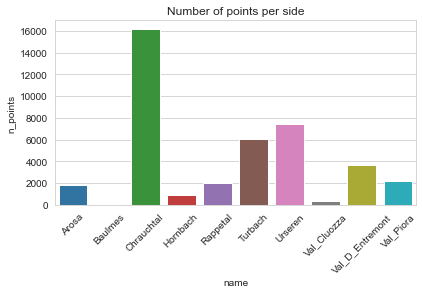

In [23]:
ax = sns.barplot(data=pd.DataFrame(site_meta_infos), x='name', y='n_points')
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.title("Number of points per side")
plt.show()

In [24]:
for site in config.sites:
    # Load data of site
    with open(f'out/{site.name}_geo_df.pickle', 'rb') as handle:
        gdf_points = pickle.load(handle).reset_index()
    with pd.option_context('display.max_columns', None):
        display(site)
        display(gdf_points.describe())

Site(name='Arosa', year=2014)

index          FID             x             y   landslide  \
count  1792.000000  1792.000000  1.792000e+03  1.792000e+03  1792.00000   
mean    447.500000   447.500000  2.771130e+06  1.184228e+06     0.50000   
std     258.724958   258.724958  2.908743e+03  1.732069e+03     0.50014   
min       0.000000     0.000000  2.766703e+06  1.180669e+06     0.00000   
25%     223.750000   223.750000  2.768600e+06  1.182896e+06     0.00000   
50%     447.500000   447.500000  2.770112e+06  1.184298e+06     0.50000   
75%     671.250000   671.250000  2.773863e+06  1.185714e+06     1.00000   
max     895.000000   895.000000  2.777550e+06  1.187885e+06     1.00000   

         elevation        slope       aspect          twi       flowacc  \
count  1792.000000  1792.000000  1792.000000  1792.000000   1792.000000   
mean   2068.048096    27.052029   178.007950     3.792932    134.839844   
std     249.731430    11.626276   104.432251     1.770936   1072.325806   
min    1283.722534     1.114149     0.144420     0.049733      0.000000   
25%    1934.652893    18.492682    87.334618     2.611293      2.000000   
50%    2084.186768    28.266408   164.694603     3.536951      7.000000   
75%    2225.233093    35.796687   276.767929     4.691010     23.250000   
max    2600.967041    68.228302   359.962189    12.945623  30385.000000   

           flowdir  curvature_plan  curvature_profile  max_precip_5Y  \
count  1792.000000      860.000000         941.000000    1792.000000   
mean     -1.546875        4.321718           5.627215     286.879211   
std      52.862516        4.876749           5.831357      38.864162   
min    -128.000000        0.000179           0.003231     204.053329   
25%       1.000000        1.178249           1.644101     248.450470   
50%       4.000000        2.932436           3.713526     291.949371   
75%      16.000000        5.719333           7.579514     322.135223   
max      64.000000       46.546356          42.509682     346.048157   

       max_precip_10Y  stack_precip_5Y  stack_precip_10Y    snow_days  \
count     1792.000000      1792.000000       1792.000000  1792.000000   
mean       290.188507        24.382984        103.871887   220.802124   
std         36.000881         4.145362         11.997052    22.704531   
min        206.714493        17.802753         73.008873   155.510040   
25%        260.785706        20.619482         93.648491   206.640686   
50%        295.353485        23.721340        106.014488   222.703720   
75%        322.135223        27.779482        114.362289   238.918167   
max        346.048157        31.465481        124.825294   273.568695   

       snow_cover_days  grow_season_length  frost_ch_freq  distance_to_roads  \
count      1792.000000         1792.000000    1792.000000        1792.000000   
mean        220.802124          132.511093      75.923393         921.200623   
std          22.704531           21.927162       4.599960         664.561218   
min         155.510040           84.285065      59.931286          10.000000   
25%         206.640686          114.447830      73.288429         338.378479   
50%         222.703720          129.821327      76.739082         845.310577   
75%         238.918167          147.413071      79.177780        1350.370300   
max         273.568695          197.056702      81.903419        2942.668945   

       distance_to_streams  density_roads  density_streams    roughness  
count          1792.000000    1792.000000      1792.000000  1792.000000  
mean            276.806519       0.000522         0.001609     2.765934  
std             207.637344       0.001197         0.001484     1.416807  
min               0.000000       0.000000         0.000000     0.205688  
25%             100.000000       0.000000         0.000286     1.697693  
50%             245.556450       0.000000         0.001281     2.688232  
75%             403.112885       0.000450         0.002544     3.687744  
max             841.724426       0.010373

Site(name='Baulmes', year=2014)

index        FID             x             y  landslide   CID  \
count  52.000000  52.000000  5.200000e+01  5.200000e+01  52.000000  26.0   
mean   12.500000  12.500000  2.526859e+06  1.181927e+06   0.500000   0.0   
std     7.573172   7.573172  1.670361e+03  1.169452e+03   0.504878   0.0   
min     0.000000   0.000000  2.524387e+06  1.179799e+06   0.000000   0.0   
25%     6.000000   6.000000  2.525620e+06  1.180985e+06   0.000000   0.0   
50%    12.500000  12.500000  2.526670e+06  1.182146e+06   0.500000   0.0   
75%    19.000000  19.000000  2.527594e+06  1.182862e+06   1.000000   0.0   
max    25.000000  25.000000  2.531528e+06  1.184394e+06   1.000000   0.0   

         elevation      slope      aspect        twi      flowacc    flowdir  \
count    52.000000  52.000000   52.000000  52.000000    52.000000  52.000000   
mean   1247.401001  23.488325  171.766052   3.867323    47.788460  10.711538   
std     214.244370  12.448594   77.991638   1.660225   166.414825  17.394316   
min     602.441101   1.722326    6.863557   1.218987     0.000000   1.000000   
25%    1219.239685  14.681649  129.282955   2.533113     1.750000   2.000000   
50%    1274.843506  22.443925  148.620125   3.654140     7.000000   4.000000   
75%    1374.692810  27.534276  193.482521   5.097465    24.750000  10.000000   
max    1568.071655  59.539280  335.803986   9.313001  1160.000000  64.000000   

       curvature_plan  curvature_profile  max_precip_5Y  max_precip_10Y  \
count       21.000000          30.000000      52.000000       52.000000   
mean         5.273861           4.093227     339.370728      339.370728   
std          5.110299           3.743996      61.890057       61.890057   
min          0.615592           0.067186     232.950546      232.950546   
25%          1.598031           1.576159     270.264771      270.264771   
50%          3.791529           2.556046     354.335297      354.335297   
75%          6.780758           5.638997     401.983719      401.983719   
max         23.387917          14.721572     410.228180      410.228180   

       stack_precip_5Y  stack_precip_10Y   snow_days  snow_cover_days  \
count        52.000000         52.000000   52.000000        52.000000   
mean         73.867439        136.571640  157.860992       157.860992   
std           4.118217          8.389395   34.657581        34.657581   
min          61.802956        108.311760   59.842041        59.842041   
25%          73.896862        136.109360  159.426346       159.426346   
50%          74.794640        138.852066  173.116486       173.116486   
75%          76.676491        141.368607  177.422901       177.422901   
max          77.879219        143.757584  184.054718       184.054718   

       grow_season_length  frost_ch_freq  distance_to_roads  \
count           52.000000      52.000000          52.000000   
mean           203.496231      58.190109         432.915161   
std             31.812542       2.333466         296.442719   
min            175.715759      51.601646          28.284271   
25%            183.202969      56.629452         167.279221   
50%            188.244781      57.604797         383.068375   
75%            205.753464      60.086251         589.718918   
max            287.185303      61.619156        1171.537476   

       distance_to_streams  density_roads  density_streams  roughness  
count            52.000000      52.000000        52.000000  52.000000  
mean            486.195953       0.001280         0.000570   2.467168  
std             280.234589       0.002155         0.000807   1.761519  
min              50.000000       0.000000         0.000000   0.297485  
25%             191.832733       0.000000         0.000000   1.383698  
50%             506.040085       0.000597         0.000020   2.130493  
75%             739.338699       0.001502         0.001055   2.660034  
max             978.621460       0.008363         0.002557   8.394470

Site(name='Chrauchtal', year=2014)

index           FID             x             y     landslide  \
count  16146.000000  16146.000000  1.614600e+04  1.614600e+04  16146.000000   
mean    4036.000000   4036.000000  2.735310e+06  1.205490e+06      0.500000   
std     2330.546516   2330.546516  1.311710e+03  2.060809e+03      0.500015   
min        0.000000      0.000000  2.731682e+06  1.200962e+06      0.000000   
25%     2018.000000   2018.000000  2.734345e+06  1.203994e+06      0.000000   
50%     4036.000000   4036.000000  2.735324e+06  1.205655e+06      0.500000   
75%     6054.000000   6054.000000  2.736447e+06  1.207118e+06      1.000000   
max     8072.000000   8072.000000  2.737725e+06  1.209907e+06      1.000000   

          elevation         slope        aspect           twi        flowacc  \
count  16146.000000  16136.000000  16136.000000  16129.000000   16146.000000   
mean    1947.207520     31.092695    190.195425      3.732503     365.466492   
std      305.350037     11.368786     82.232839      1.935550    3981.606445   
min      833.099304      0.263884      0.129739      0.004213       0.000000   
25%     1751.456665     24.422706    126.577463      2.415128       2.000000   
50%     2012.872437     31.913072    191.967827      3.450324       8.000000   
75%     2184.725525     38.325132    253.092995      4.610670      27.000000   
max     2607.009277     82.769753    359.967285     14.439417  158595.000000   

            flowdir  curvature_plan  curvature_profile  max_precip_5Y  \
count  16146.000000     7764.000000        8113.000000   16146.000000   
mean       4.872662        5.252088           6.567107     391.482391   
std       33.407059        6.018931           8.265321      35.743076   
min     -128.000000        0.001840           0.000128     257.944214   
25%        2.000000        1.551948           1.914608     374.170929   
50%        4.000000        3.590749           4.414261     404.921387   
75%       16.000000        6.843515           8.529507     419.071167   
max       64.000000       90.160988         254.856750     450.313599   

       max_precip_10Y  stack_precip_5Y  stack_precip_10Y     snow_days  \
count    16146.000000     16146.000000      16146.000000  16146.000000   
mean       391.482391        61.339836        134.315857    221.335236   
std         35.743076        11.646118         12.923457     28.097551   
min        257.944214        38.373985         92.281570    120.419815   
25%        374.170929        49.646820        129.847839    201.556335   
50%        404.921387        65.432518        134.556473    225.076736   
75%        419.071167        71.873970        143.803879    241.712219   
max        450.313599        76.266731        159.878937    270.846283   

       snow_cover_days  grow_season_length  frost_ch_freq  distance_to_roads  \
count     16146.000000        16146.000000   16146.000000       16146.000000   
mean        221.335236          138.034027      72.652794        2613.386719   
std          28.097551           26.776613       5.346861         975.670776   
min         120.419815           92.184830      57.893650           0.000000   
25%         201.556335          115.638077      68.742279        1926.681091   
50%         225.076736          135.096802      73.697449        2595.149414   
75%         241.712219          157.796951      75.994766        3483.676270   
max         270.846283          235.635742      82.735786        4590.697266   

       distance_to_streams  density_roads  density_streams     roughness  
count         16146.000000   16146.000000     16146.000000  16146.000000  
mean            164.851791       0.000015         0.002924      5.421455  
std             155.751541       0.000136         0.002024     69.824478  
min               0.000000       0.000000         0.000000      0.074585  
25%              44.721359       0.000000         0.001280      2.300262  
50%             114.017540       0.000000         0.002711      3.175171  
75%       

Site(name='Hornbach', year=2015)

index        FID             x             y   landslide  \
count  876.00000  876.00000  8.760000e+02  8.760000e+02  876.000000   
mean   218.50000  218.50000  2.632648e+06  1.208989e+06    0.500000   
std    126.51161  126.51161  1.669144e+03  1.387692e+03    0.500286   
min      0.00000    0.00000  2.628217e+06  1.206036e+06    0.000000   
25%    109.00000  109.00000  2.631713e+06  1.207833e+06    0.000000   
50%    218.50000  218.50000  2.633082e+06  1.208912e+06    0.500000   
75%    328.00000  328.00000  2.633974e+06  1.210177e+06    1.000000   
max    437.00000  437.00000  2.635167e+06  1.211756e+06    1.000000   

         elevation       slope      aspect         twi       flowacc  \
count   876.000000  876.000000  876.000000  876.000000    876.000000   
mean   1033.943237   26.563572  196.322342    3.944656     94.736298   
std     106.480370   11.020671   83.449974    1.735272    793.826660   
min     773.451111    1.346363    0.849525    0.655958      0.000000   
25%     978.858170   19.263822  137.050579    2.807854      3.000000   
50%    1037.288025   28.155968  200.351608    3.739113      9.000000   
75%    1107.839966   34.395073  259.947830    4.783939     28.000000   
max    1327.684082   67.877373  359.945099   11.957935  17245.000000   

          flowdir  curvature_plan  curvature_profile  max_precip_5Y  \
count  876.000000      431.000000         429.000000     876.000000   
mean     7.077626        3.905255           6.459016     325.830994   
std     32.985654        5.514412           8.280389      15.618381   
min   -128.000000        0.001107           0.000793     287.003265   
25%      2.000000        0.840008           1.169610     316.974945   
50%      8.000000        2.139075           3.281144     327.951324   
75%     16.000000        4.775221           8.820986     336.019226   
max     64.000000       65.756775          77.085983     360.743744   

       max_precip_10Y  stack_precip_5Y  stack_precip_10Y   snow_days  \
count      876.000000       876.000000        876.000000  876.000000   
mean       367.889130        57.634945         33.962421  134.591827   
std         18.014482         7.882643          4.340976   14.934687   
min        328.466858        47.015789         29.000000   87.384895   
25%        357.783417        51.426804         31.025751  128.830276   
50%        364.283173        55.865292         32.799450  139.045074   
75%        371.895996        61.066326         35.095909  144.642044   
max        423.950653        82.141609         48.078823  161.408325   

       snow_cover_days  grow_season_length  frost_ch_freq  distance_to_roads  \
count       876.000000          876.000000     876.000000         876.000000   
mean        134.591827          221.629501      60.398956         272.889618   
std          14.934687           12.519804       1.504095         212.559586   
min          87.384895          199.517426      57.357880           0.000000   
25%         128.830276          210.581131      58.991573         107.352835   
50%         139.045074          218.881165      60.785206         234.200745   
75%         144.642044          228.124420      61.547974         389.101532   
max         161.408325          255.905746      64.503174        1057.591553   

       distance_to_streams  density_roads  density_streams   roughness  
count           876.000000     876.000000       876.000000  876.000000  
mean            109.132637       0.001322         0.003730    2.709791  
std              74.966660       0.001048         0.001124    1.338456  
min               0.000000       0.000000         0.000110    0.115601  
25%              59.577380       0.000503         0.003041    1.780457  
50%              94.339813       0.001227         0.003903    2.735321  
75%             138.924438       0.001957         0.004556    3.526672  
max             468.401550       0.005465         0.005931   12.412231

Site(name='Rappetal', year=2015)

index          FID             x             y    landslide  \
count  2046.000000  2046.000000  2.046000e+03  2.046000e+03  2046.000000   
mean    511.000000   511.000000  2.659261e+06  1.139224e+06     0.500000   
std     295.386717   295.386717  1.413943e+03  8.458988e+02     0.500122   
min       0.000000     0.000000  2.655789e+06  1.137234e+06     0.000000   
25%     255.250000   255.250000  2.658232e+06  1.138666e+06     0.000000   
50%     511.000000   511.000000  2.659091e+06  1.139140e+06     0.500000   
75%     766.750000   766.750000  2.660395e+06  1.139801e+06     1.000000   
max    1022.000000  1022.000000  2.662742e+06  1.141716e+06     1.000000   

          CID    elevation        slope       aspect          twi  \
count  1023.0  2046.000000  2045.000000  2045.000000  2045.000000   
mean      0.0  2217.982422    31.777281   207.172770     3.865473   
std       0.0   202.152679    10.386792    78.740676     1.939530   
min       0.0  1441.419189     0.451267     0.121974     0.480050   
25%       0.0  2081.051392    26.702328   156.035294     2.549707   
50%       0.0  2212.790283    33.404541   173.932663     3.654631   
75%       0.0  2351.086975    38.421223   282.858368     4.894327   
max       0.0  2738.213623    61.215958   359.715393    12.955767   

            flowacc      flowdir  curvature_plan  curvature_profile  \
count   2046.000000  2046.000000     1049.000000        1022.000000   
mean     274.818176    11.729717        4.151257           5.092834   
std     2533.361816    26.521713        4.110291           5.243728   
min        0.000000  -128.000000        0.005564           0.005986   
25%        3.000000     2.000000        1.235746           1.358043   
50%       10.000000     4.000000        2.966586           3.555683   
75%       35.000000    16.000000        5.711409           6.947740   
max    51119.000000    64.000000       30.595797          37.053997   

       max_precip_5Y  max_precip_10Y  stack_precip_5Y  stack_precip_10Y  \
count    2046.000000     2046.000000      2046.000000       2046.000000   
mean      384.459412      384.461884        18.508286         34.073765   
std        24.841061       24.838642         0.753249          2.625199   
min       282.233002      282.233002        17.859224         26.180067   
25%       368.156464      368.156464        18.000000         32.409462   
50%       375.918671      375.918671        18.153522         33.856178   
75%       408.083229      408.083229        18.838697         35.285145   
max       430.521179      430.521179        22.721426         44.311153   

         snow_days  snow_cover_days  grow_season_length  frost_ch_freq  \
count  2046.000000      2046.000000         2046.000000    2046.000000   
mean    253.558105       253.558105          100.646698      77.227478   
std      23.709656        23.709656           22.365213       5.090197   
min     166.364349       166.364349           35.441860      58.345108   
25%     236.636917       236.636917           85.277122      74.438751   
50%     252.701889       252.701889          103.305260      76.354172   
75%     273.623230       273.623230          116.625294      80.651718   
max     324.762177       324.762177          186.577637     100.350266   

       distance_to_roads  distance_to_streams  density_roads  density_streams  \
count        2046.000000          2046.000000   2.046000e+03      2046.000000   
mean         3035.079590           285.636841   2.494268e-07         0.001420   
std           766.836060           194.460052   1.128225e-05         0.001159   
min           460.977234             0.000000   0.000000e+00         0.000000   
25%          2490.983765           128.062485   0.000000e+00         0.000508   
50%          3030.272339           262.106567   0.000000e+00         0.001325   
75%          3693.033508           411.096100   0.000000e+00         0.001930   
max          4787.118164           979.897949   5.103272e-04         0.0057

Site(name='Turbach', year=2013)

index          FID             x             y    landslide  \
count  6020.000000  6020.000000  6.020000e+03  6.020000e+03  6020.000000   
mean   1504.500000  1504.500000  2.593520e+06  1.145352e+06     0.500000   
std     868.984285   868.984285  1.596261e+03  1.752839e+03     0.500042   
min       0.000000     0.000000  2.589144e+06  1.141900e+06     0.000000   
25%     752.000000   752.000000  2.592477e+06  1.143952e+06     0.000000   
50%    1504.500000  1504.500000  2.593794e+06  1.145110e+06     0.500000   
75%    2257.000000  2257.000000  2.594873e+06  1.146721e+06     1.000000   
max    3009.000000  3009.000000  2.596047e+06  1.148956e+06     1.000000   

         elevation        slope       aspect          twi       flowacc  \
count  6020.000000  6014.000000  6014.000000  6014.000000   6020.000000   
mean   1858.257446    29.942663   187.966833     3.834220    220.438370   
std     264.882111    10.373481    95.621784     2.018389   1641.598633   
min    1105.683838     0.416987     0.063063     0.111250      0.000000   
25%    1687.883148    23.517044    94.657135     2.341379      2.000000   
50%    1881.933838    30.624944   218.392715     3.536734      8.000000   
75%    2056.818848    36.451669   264.466064     4.907369     35.000000   
max    2524.028320    69.833969   359.535980    12.886166  66351.000000   

           flowdir  curvature_plan  curvature_profile  max_precip_5Y  \
count  6020.000000     2947.000000        3052.000000    6020.000000   
mean     -3.304153        5.481261           5.784171     434.850677   
std      49.929221        5.875289           8.170944      39.015450   
min    -128.000000        0.001474           0.001186     283.139496   
25%       1.000000        1.568816           1.582214     402.311920   
50%       8.000000        3.678939           3.757263     434.275848   
75%      16.000000        7.325707           7.420627     471.999268   
max      64.000000       57.274899         224.307632     496.677185   

       max_precip_10Y  stack_precip_5Y  stack_precip_10Y    snow_days  \
count     6020.000000      6020.000000       6020.000000  6020.000000   
mean       434.850677        73.380692        339.152527   212.483963   
std         39.015450         9.782400         34.310577    23.214571   
min        283.139496        54.432922        221.403336   138.713654   
25%        402.311920        64.898232        314.841858   200.120285   
50%        434.275848        74.296631        336.664642   213.544037   
75%        471.999268        83.118309        367.134216   228.467358   
max        496.677185        90.226501        397.531433   256.142639   

       snow_cover_days  grow_season_length  frost_ch_freq  distance_to_roads  \
count      6020.000000         6020.000000    6020.000000        6020.000000   
mean        212.483963          144.393661      68.876060        1447.257446   
std          23.214571           23.647465       5.394574         809.708557   
min         138.713654          100.324249      57.643486           0.000000   
25%         200.120285          129.461945      65.925255         656.886124   
50%         213.544037          141.573288      68.815811        1636.703979   
75%         228.467358          159.813812      71.615883        2103.758545   
max         256.142639          219.261688      79.421692        2902.033691   

       distance_to_streams  density_roads  density_streams    roughness  
count          6020.000000    6020.000000      6020.000000  6020.000000  
mean            313.764771       0.000292         0.001364     5.384167  
std             215.982315       0.000772         0.001536    64.170364  
min               0.000000       0.000000         0.000000     0.056885  
25%             131.529465       0.000000         0.000074     2.182037  
50%             275.499298       0.000000         0.000989     2.974487  
75%             474.341644       0.000000         0.001963     3.783356  
max            1020.196045      

Site(name='Urseren', year=2013)

index          FID             x             y    landslide  \
count  7404.000000  7404.000000  7.404000e+03  7.404000e+03  7404.000000   
mean   1850.500000  1850.500000  2.682339e+06  1.162153e+06     0.500000   
std    1068.747485  1068.747485  2.640854e+03  2.022305e+03     0.500034   
min       0.000000     0.000000  2.677239e+06  1.157080e+06     0.000000   
25%     925.000000   925.000000  2.680162e+06  1.160697e+06     0.000000   
50%    1850.500000  1850.500000  2.682026e+06  1.162158e+06     0.500000   
75%    2776.000000  2776.000000  2.684541e+06  1.163525e+06     1.000000   
max    3701.000000  3701.000000  2.688282e+06  1.166961e+06     1.000000   

         elevation        slope       aspect          twi        flowacc  \
count  7404.000000  7402.000000  7399.000000  7402.000000    7404.000000   
mean   1950.904419    31.415402   161.278977     3.687038     240.137756   
std     253.811050    11.953896    79.082596     1.871462    2570.468750   
min    1428.472656     0.000000     0.013798     0.040408       0.000000   
25%    1767.778748    24.565508   116.096931     2.382467       2.000000   
50%    1962.861633    32.836210   148.167969     3.474239       8.000000   
75%    2128.672424    39.362175   191.201477     4.626086      27.000000   
max    2920.848389    67.467285   359.946075    13.891070  104951.000000   

           flowdir  curvature_plan  curvature_profile  max_precip_5Y  \
count  7404.000000     3690.000000        3753.000000    7404.000000   
mean      1.882361        5.103655           5.861459     274.197418   
std      36.962322        5.602064           6.492534      38.806988   
min    -128.000000        0.000000           0.000000     217.171646   
25%       2.000000        1.475542           1.731091     250.531021   
50%       2.000000        3.440676           3.932190     267.259094   
75%       4.000000        6.776669           7.597961     289.055939   
max      64.000000       50.187393          84.850380     458.329865   

       max_precip_10Y  stack_precip_5Y  stack_precip_10Y    snow_days  \
count     7404.000000      7404.000000       7404.000000  7404.000000   
mean       275.115143        48.707886        192.704376   224.002838   
std         39.106148         6.725019         26.300493    30.749224   
min        217.171646        34.468391        150.720520   165.169113   
25%        250.531021        42.938519        177.018219   199.911484   
50%        267.259094        49.049145        188.930298   221.740860   
75%        291.697449        54.859642        203.329315   242.246613   
max        458.329865        62.548618        284.844086   349.648315   

       snow_cover_days  grow_season_length  frost_ch_freq  distance_to_roads  \
count      7404.000000         7404.000000    7404.000000        7404.000000   
mean        224.002838          136.677322      71.226601         663.413147   
std          30.749224           29.936628       6.113048         480.625793   
min         165.169113           23.958551      57.485722           0.000000   
25%         199.911484          117.290512      66.138649         277.127960   
50%         221.740860          136.626877      72.733292         580.043091   
75%         242.246613          159.491577      75.175720         945.211624   
max         349.648315          191.419586      96.286583        2930.272949   

       distance_to_streams  density_roads  density_streams    roughness  
count          7404.000000    7404.000000      7404.000000  7404.000000  
mean            152.331100       0.000698         0.002988     4.398397  
std             143.061813       0.001233         0.001831    45.765530  
min               0.000000       0.000000         0.000000     0.000000  
25%              44.721359       0.000000         0.001740     2.356201  
50%             111.803398       0.000000         0.002689     3.317749  
75%             212.132034       0.001146         0.004129     4.222443  
max            1074.802

Site(name='Val_Cluozza', year=2015)

index         FID             x             y   landslide  \
count  354.000000  354.000000  3.540000e+02  3.540000e+02  354.000000   
mean    88.000000   88.000000  2.805392e+06  1.170729e+06    0.500000   
std     51.167004   51.167004  1.042625e+03  1.432185e+03    0.500708   
min      0.000000    0.000000  2.803285e+06  1.165202e+06    0.000000   
25%     44.000000   44.000000  2.804404e+06  1.169840e+06    0.000000   
50%     88.000000   88.000000  2.805741e+06  1.170872e+06    0.500000   
75%    132.000000  132.000000  2.806278e+06  1.171740e+06    1.000000   
max    176.000000  176.000000  2.807686e+06  1.173402e+06    1.000000   

         elevation       slope      aspect         twi       flowacc  \
count   352.000000  352.000000  352.000000  352.000000    352.000000   
mean   2314.641736   32.735132  196.247360    3.689422    273.724432   
std     172.389194    9.559454   88.072042    1.836366   2481.304678   
min    1791.842651    1.835110    9.384809    0.496381      0.000000   
25%    2200.992615   27.225031  109.441063    2.424234      3.000000   
50%    2337.509033   32.997881  234.317368    3.426099      9.000000   
75%    2449.965698   39.485134  265.265343    4.711736     30.500000   
max    2759.131348   58.098099  349.643188   11.767179  41961.000000   

          flowdir  curvature_plan  curvature_profile  max_precip_5Y  \
count  354.000000      177.000000         181.000000     351.000000   
mean    -3.259887        4.713562           6.616342     179.981703   
std     44.547905        5.064728           7.004671      15.370022   
min   -128.000000        0.000328           0.066325     149.670242   
25%      1.000000        1.518192           2.035760     168.732071   
50%      8.000000        3.217711           4.560994     183.003647   
75%     16.000000        6.113153           8.340531     191.144592   
max     64.000000       31.154510          37.339436     207.626984   

       max_precip_10Y  stack_precip_5Y  stack_precip_10Y   snow_days  \
count      351.000000       351.000000        351.000000  351.000000   
mean       216.717778        20.394496         41.416621  229.246248   
std         22.525785         1.965767          3.477905   17.742235   
min        175.747086        14.868594         33.899780  190.888443   
25%        197.365356        19.173470         38.925900  216.239380   
50%        215.187988        20.865295         40.924358  231.815765   
75%        232.547943        21.270157         45.164574  241.946335   
max        255.080353        25.664942         50.000000  277.470947   

       snow_cover_days  grow_season_length  frost_ch_freq  distance_to_roads  \
count       351.000000          351.000000     351.000000         354.000000   
mean        229.246248          124.385125      76.768844        2834.932861   
std          17.742235           17.442890       2.750447         803.744141   
min         190.888443           80.463341      68.224739        1457.737915   
25%         216.239380          109.521835      75.369278        2261.923950   
50%         231.815765          122.349503      76.473839        2787.812622   
75%         241.946335          137.225861      78.834404        3515.518433   
max         277.470947          166.013138      88.252876        6037.391602   

       distance_to_streams  density_roads  density_streams   roughness  
count           354.000000          354.0       354.000000  354.000000  
mean            449.969421            0.0         0.000607    3.383201  
std             233.651520            0.0         0.000884    1.360256  
min               0.000000            0.0         0.000000    0.000000  
25%             273.208389            0.0         0.000000    2.546753  
50%             481.352158            0.0         0.000025    3.250122  
75%             624.998245            0.0         0.001119    4.206482  
max            1265.898926            0.0         0.003080    9.234619

Site(name='Val_D_Entremont', year=2013)

index          FID             x             y    landslide  \
count  3645.000000  3645.000000  3.645000e+03  3.645000e+03  3645.000000   
mean    910.750069   910.750069  2.580535e+06  1.084952e+06     0.500137   
std     526.182656   526.182656  1.289699e+03  2.362932e+03     0.500069   
min       0.000000     0.000000  2.577006e+06  1.078748e+06     0.000000   
25%     455.000000   455.000000  2.579611e+06  1.083273e+06     0.000000   
50%     911.000000   911.000000  2.580550e+06  1.084911e+06     1.000000   
75%    1366.000000  1366.000000  2.581395e+06  1.086512e+06     1.000000   
max    1822.000000  1822.000000  2.583400e+06  1.090047e+06     1.000000   

         elevation        slope       aspect          twi        flowacc  \
count  3642.000000  3640.000000  3640.000000  3640.000000    3642.000000   
mean   2238.890201    28.253644   161.436033     4.071694     360.814662   
std     207.223714     9.983010    85.065328     1.906919    5396.498041   
min    1603.754639     0.610823     0.045178     0.151158       0.000000   
25%    2102.447266    22.020172   104.160654     2.731388       3.000000   
50%    2251.407593    29.263636   138.643318     3.888847      11.000000   
75%    2387.780945    34.882233   228.248356     5.087331      39.000000   
max    2837.570068    59.818146   359.692047    15.283634  294394.000000   

           flowdir  curvature_plan  curvature_profile  max_precip_5Y  \
count  3645.000000     1937.000000        1717.000000    3640.000000   
mean     -0.377778        3.630896           4.963088     375.802558   
std      40.247419        4.009268           5.913976      75.713523   
min    -128.000000        0.000525           0.002977     240.009064   
25%       1.000000        1.024150           1.447181     316.954376   
50%       2.000000        2.376471           3.363125     372.972443   
75%       8.000000        4.834720           6.293104     426.457275   
max      64.000000       47.330585          82.840630     608.682434   

       max_precip_10Y  stack_precip_5Y  stack_precip_10Y    snow_days  \
count     3640.000000      3640.000000       3640.000000  3640.000000   
mean       375.802558        75.969392        274.881179   262.393132   
std         75.713523        13.958418         55.336345    33.034259   
min        240.009064        52.980888        177.207535   185.086029   
25%        316.954376        61.956699        234.687164   236.432205   
50%        372.972443        76.073280        265.450470   264.316986   
75%        426.457275        87.638115        314.741180   279.795288   
max        608.682434       104.913864        434.639557   359.717316   

       snow_cover_days  grow_season_length  frost_ch_freq  distance_to_roads  \
count      3640.000000         3621.000000    3621.000000        3645.000000   
mean        262.393132           93.069681      75.065366        1163.133057   
std          33.034259           32.970785       5.714809         768.388794   
min         185.086029            6.213332      64.043755           0.000000   
25%         236.432205           74.330544      70.227615         551.724548   
50%         264.316986           90.284760      75.901924        1016.070862   
75%         279.795288          118.288742      79.291222        1680.267822   
max         359.717316          169.919449     102.612015        3316.941406   

       distance_to_streams  density_roads  density_streams    roughness  
count          3645.000000    3645.000000      3645.000000  3645.000000  
mean            160.081100       0.000287         0.002874     5.003361  
std             138.205505       0.000685         0.001728    74.180161  
min               0.000000       0.000000         0.000000     0.000000  
25%              53.851646       0.000000         0.001531     2.052490  
50%             117.046997       0.000000         0.002766     2.876465  
75%             237.697281       0.000000         0.003995     3.636230  
max             820.548

Site(name='Val_Piora', year=2015)

index          FID             x             y    landslide  \
count  2232.000000  2232.000000  2.232000e+03  2.232000e+03  2232.000000   
mean    557.500000   557.500000  2.697998e+06  1.155696e+06     0.500000   
std     322.233514   322.233514  2.292305e+03  7.940238e+02     0.500112   
min       0.000000     0.000000  2.694174e+06  1.153667e+06     0.000000   
25%     278.750000   278.750000  2.695964e+06  1.155090e+06     0.000000   
50%     557.500000   557.500000  2.698148e+06  1.155759e+06     0.500000   
75%     836.250000   836.250000  2.699913e+06  1.156333e+06     1.000000   
max    1115.000000  1115.000000  2.702541e+06  1.157297e+06     1.000000   

         elevation        slope       aspect          twi       flowacc  \
count  2232.000000  2230.000000  2227.000000  2230.000000   2232.000000   
mean   2159.356445    28.982114   173.971602     3.925410    109.732079   
std     162.738953    12.003721    79.405138     1.815448    843.125000   
min    1693.077271     0.000000     0.365902     0.009077      0.000000   
25%    2027.864807    21.586257   122.312393     2.696606      3.000000   
50%    2154.190063    30.948539   178.331909     3.759745     10.000000   
75%    2280.011963    36.749828   221.672714     4.854995     31.000000   
max    2650.749512    67.082031   359.846436    12.968196  30839.000000   

           flowdir  curvature_plan  curvature_profile  max_precip_5Y  \
count  2232.000000     1114.000000        1083.000000    2232.000000   
mean      3.022849        4.066450           5.416699     314.862671   
std      36.366257        4.472823           6.591538      19.362209   
min    -128.000000        0.000000           0.000000     284.086304   
25%       2.000000        1.057575           1.484108     296.109283   
50%       4.000000        2.701838           3.600288     314.055389   
75%       8.000000        5.283782           6.790861     327.204254   
max      64.000000       38.425079          76.413475     389.841522   

       max_precip_10Y  stack_precip_5Y  stack_precip_10Y    snow_days  \
count     2232.000000      2232.000000       2232.000000  2232.000000   
mean       346.296326        29.235519         48.758667   239.315018   
std         28.137989         3.587642          6.324672    17.580770   
min        294.696136        23.336559         38.000000   190.414536   
25%        332.598846        25.886477         44.407665   225.278961   
50%        340.170959        29.474689         49.074024   240.436691   
75%        353.308960        31.712433         52.932404   252.693588   
max        453.569214        39.509712         64.368500   284.728363   

       snow_cover_days  grow_season_length  frost_ch_freq  distance_to_roads  \
count      2232.000000         2232.000000    2232.000000        2232.000000   
mean        239.315018          122.040237      77.831825        1309.129639   
std          17.580770           19.696264       5.666965         986.358154   
min         190.414536           79.227348      64.483498           0.000000   
25%         225.278961          108.965363      73.994545         464.650253   
50%         240.436691          117.056030      78.039719        1075.639404   
75%         252.693588          134.602676      81.906052        1980.505005   
max         284.728363          177.998840      88.192093        3707.465332   

       distance_to_streams  density_roads  density_streams    roughness  
count          2232.000000    2232.000000      2232.000000  2232.000000  
mean            263.004578       0.000292         0.001588     5.204981  
std             202.517899       0.000557         0.001446    72.948341  
min               0.000000       0.000000         0.000000     0.000000  
25%              98.488579       0.000000         0.000237     1.972504  
50%             210.594093       0.000000         0.001301     3.043579  
75%             400.312355       0.000251         0.002490     3.858917  
max             934.077087      

In [25]:
def plot_f(f):
    for site in config.sites:
        # Load data of site
        with open(f'out/{site.name}_geo_df.pickle', 'rb') as handle:
            gdf_points = pickle.load(handle).reset_index()

        # Encode aspect
        gdf_points['aspect_factor'] = gdf_points['aspect'].apply(angle_to_direction)

        # plot features for site
        fig, axs = plt.subplots(4, 6, figsize=(16, 16))
        for feature, ax in zip(features, axs.flatten()):
            ax.set_title(feature)
            f(gdf_points, feature, ax)
        fig.suptitle(f"{site.name} features", fontsize=16)
        plt.tight_layout()
        plt.show()

        del gdf_points


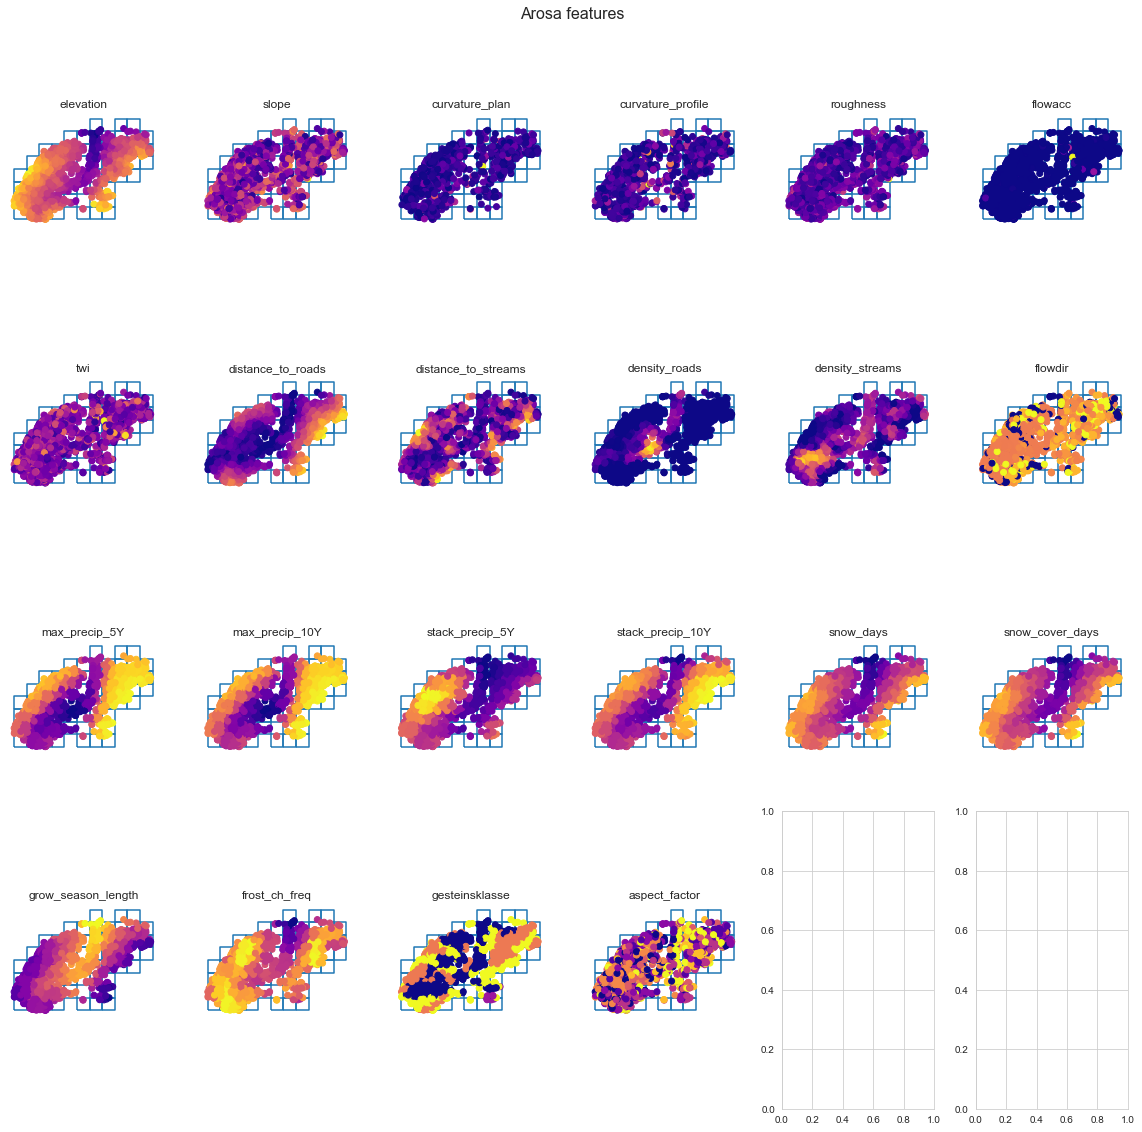

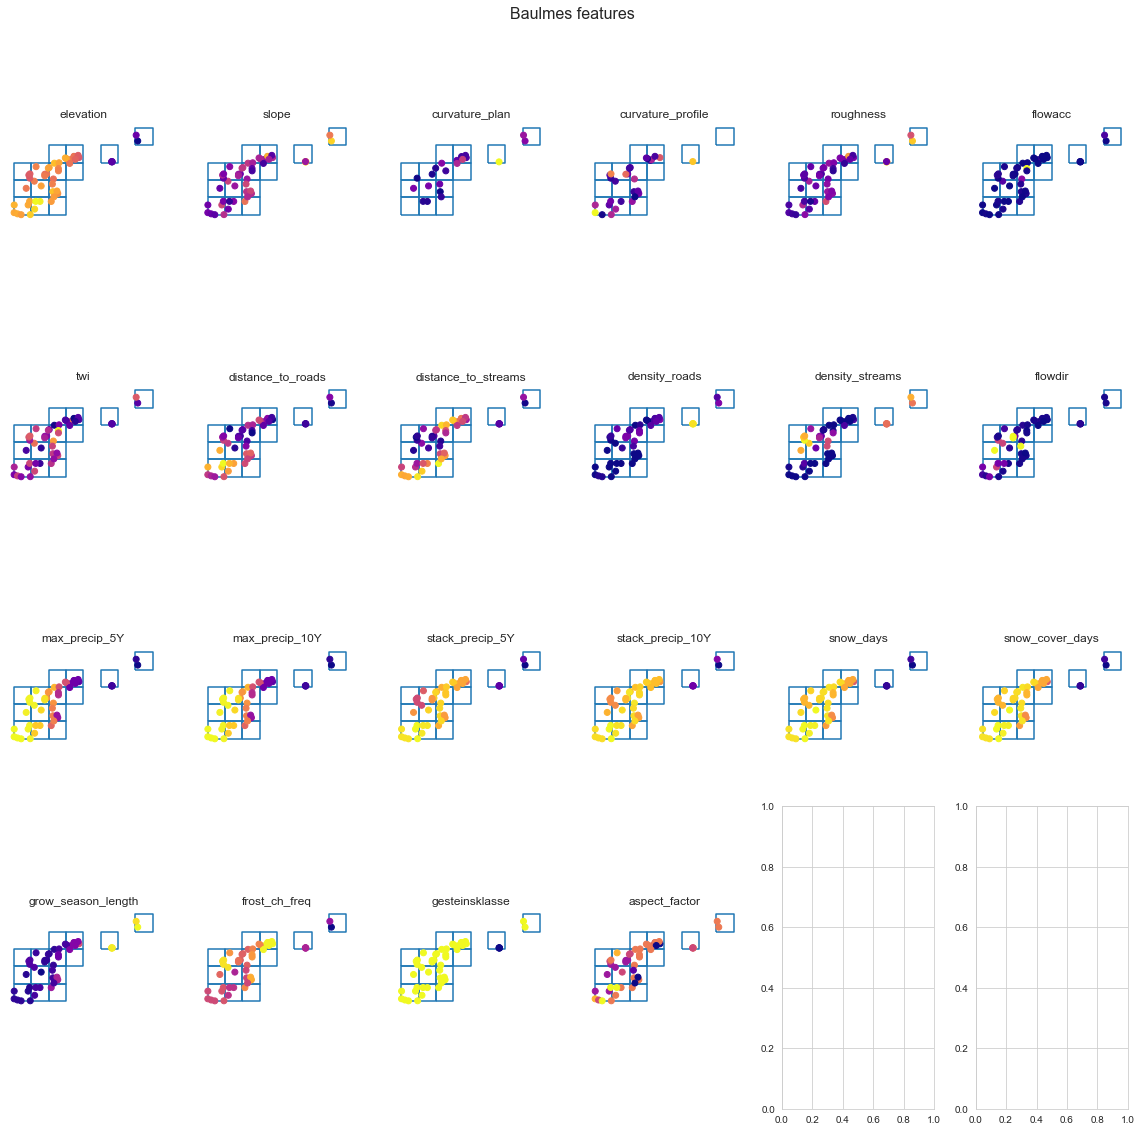

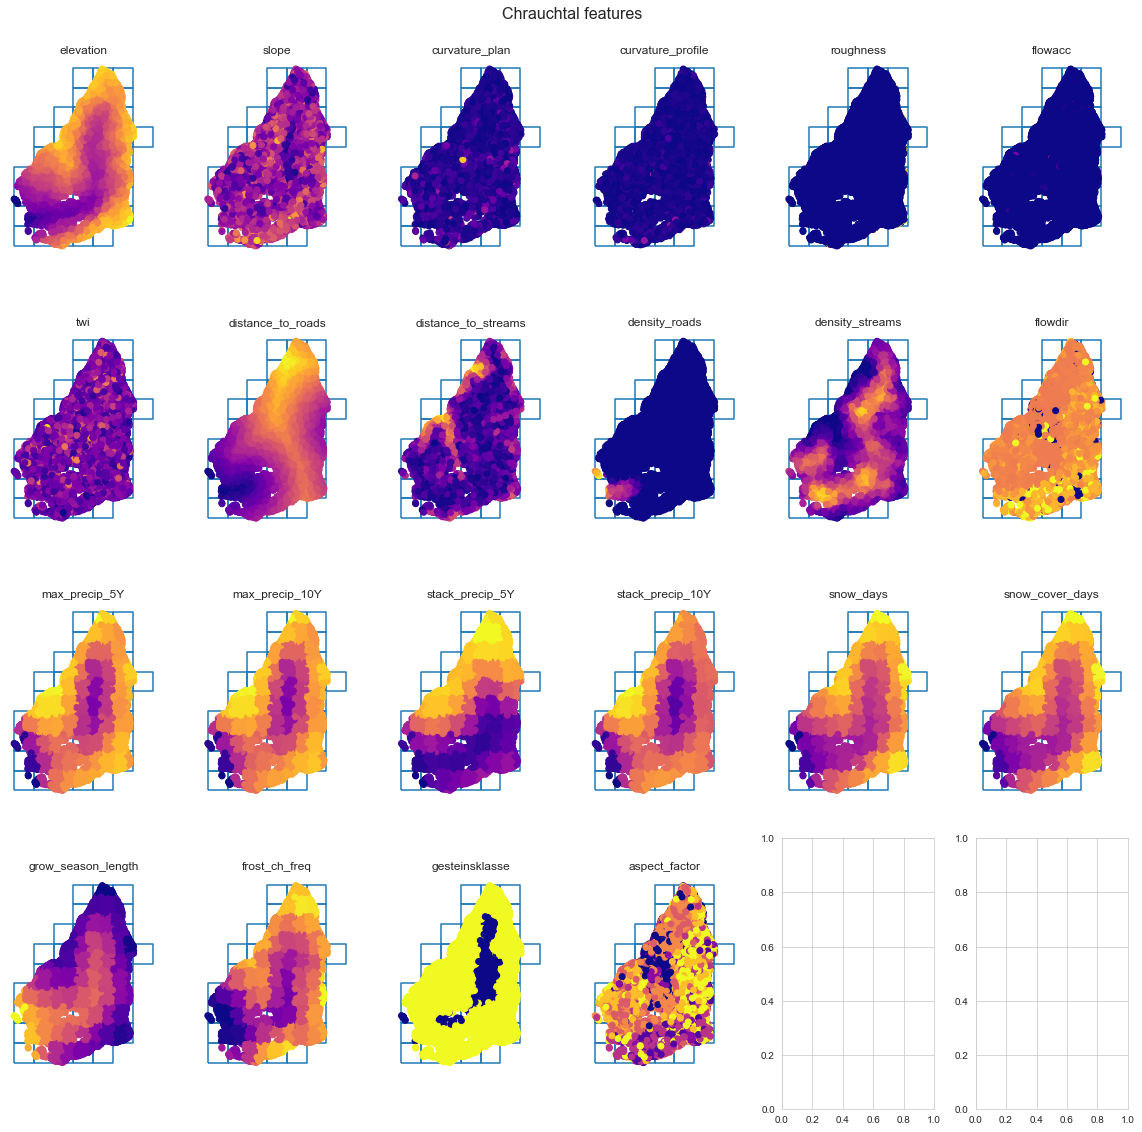

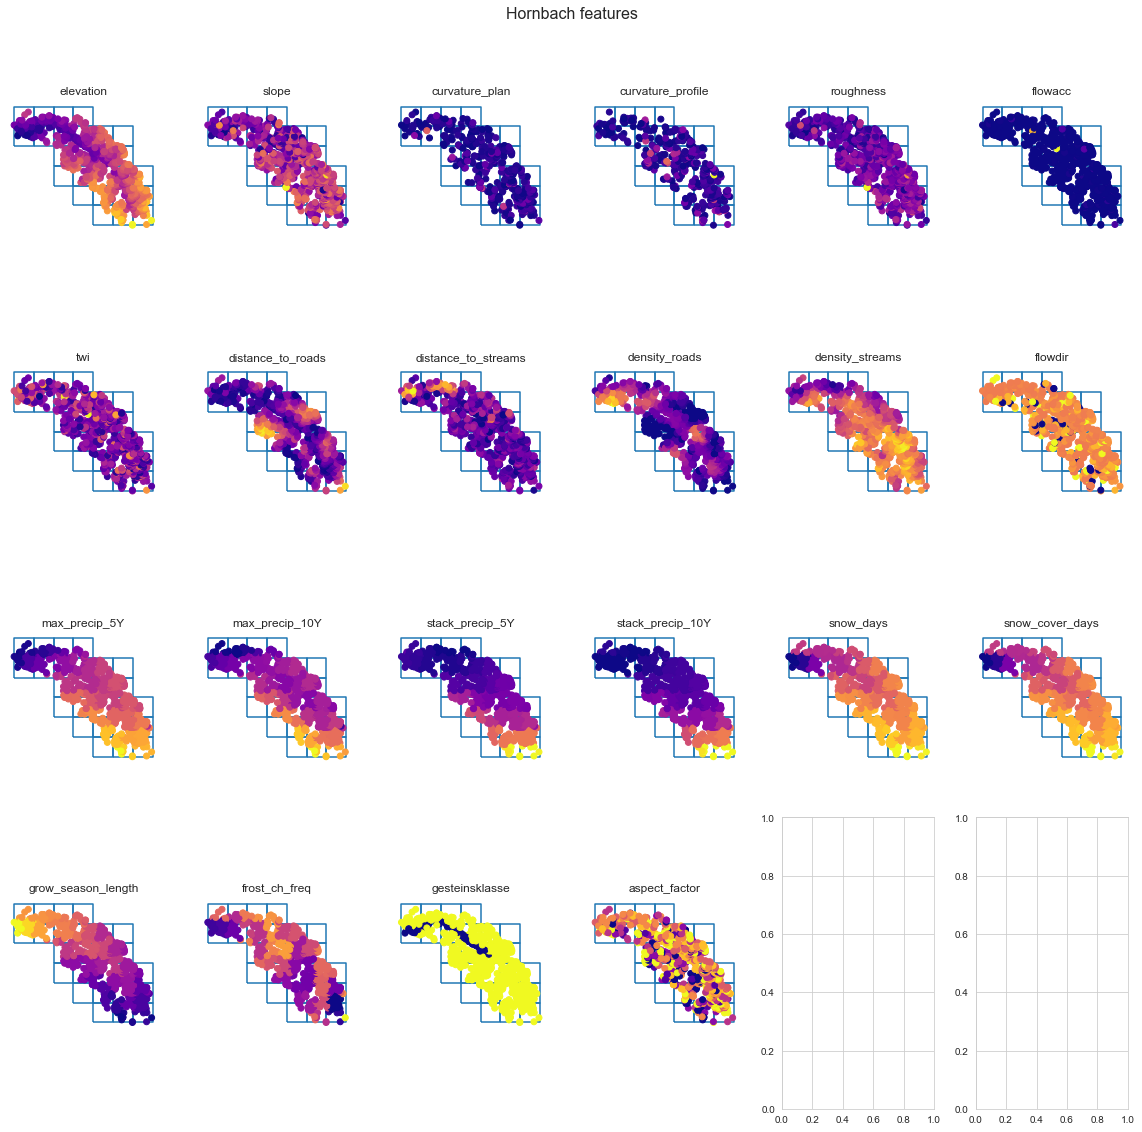

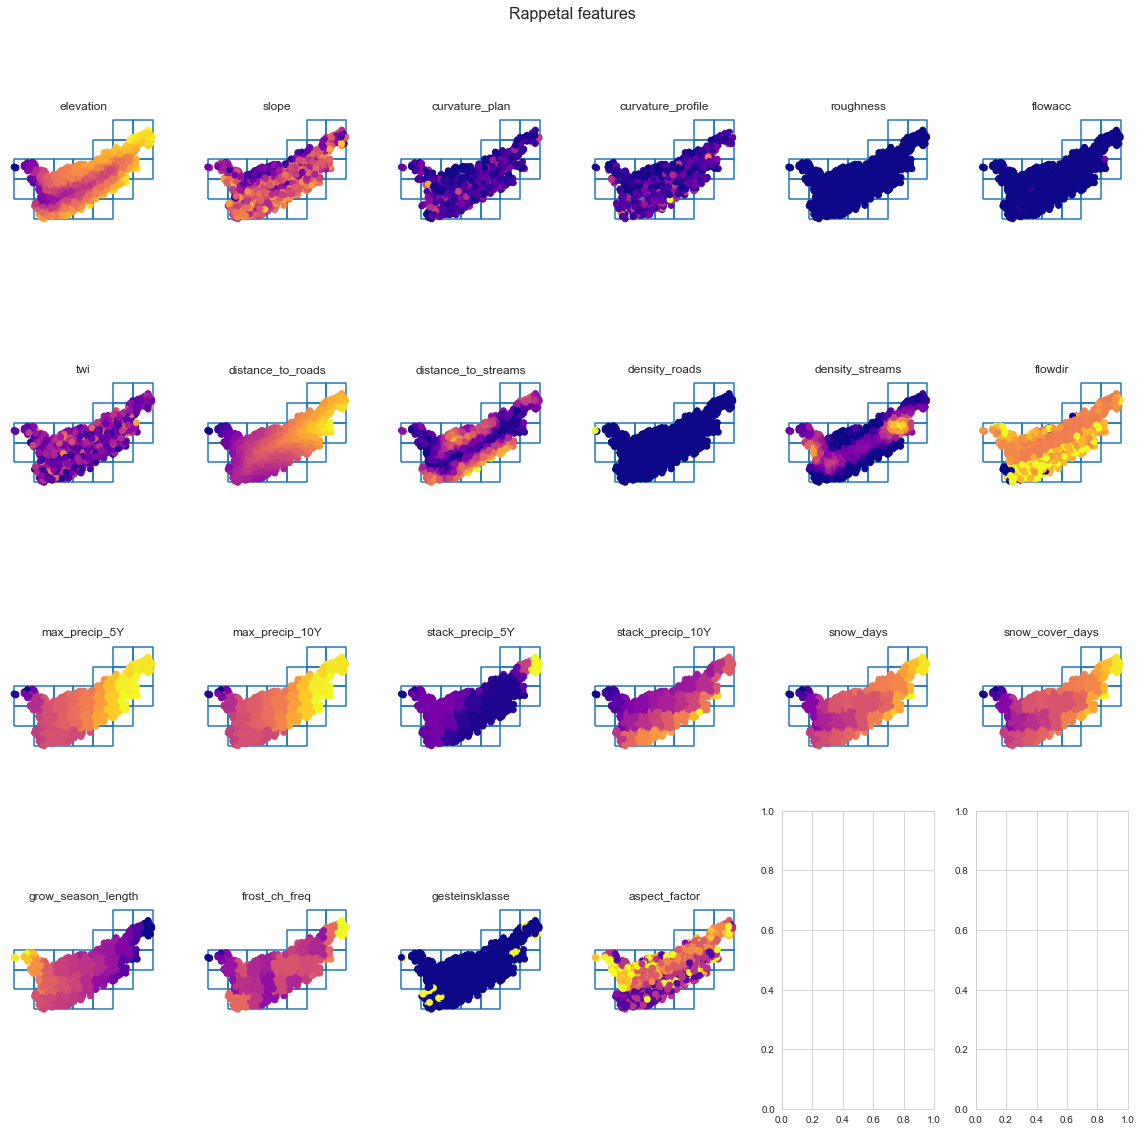

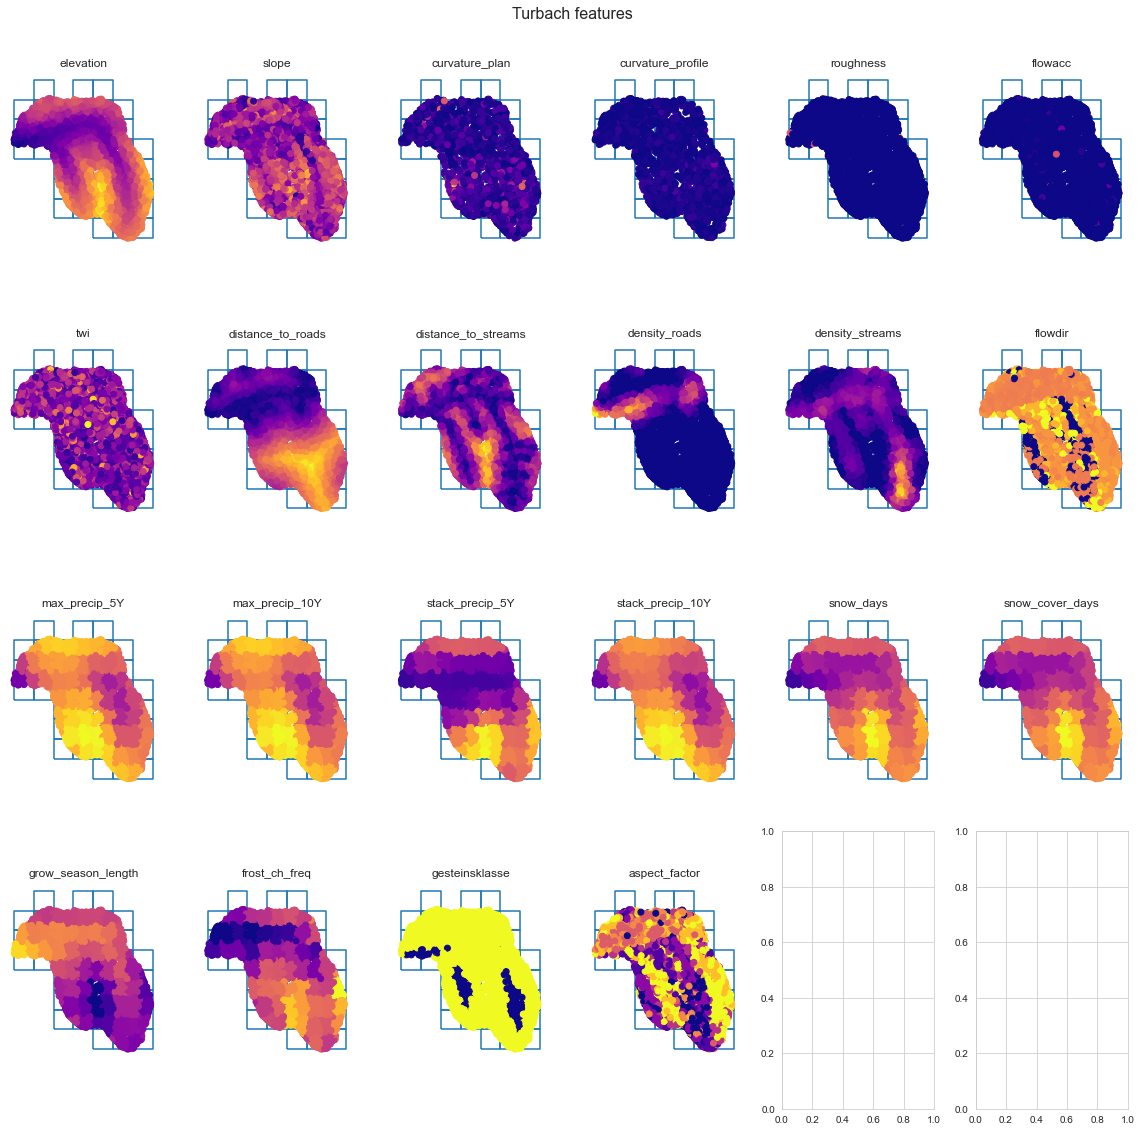

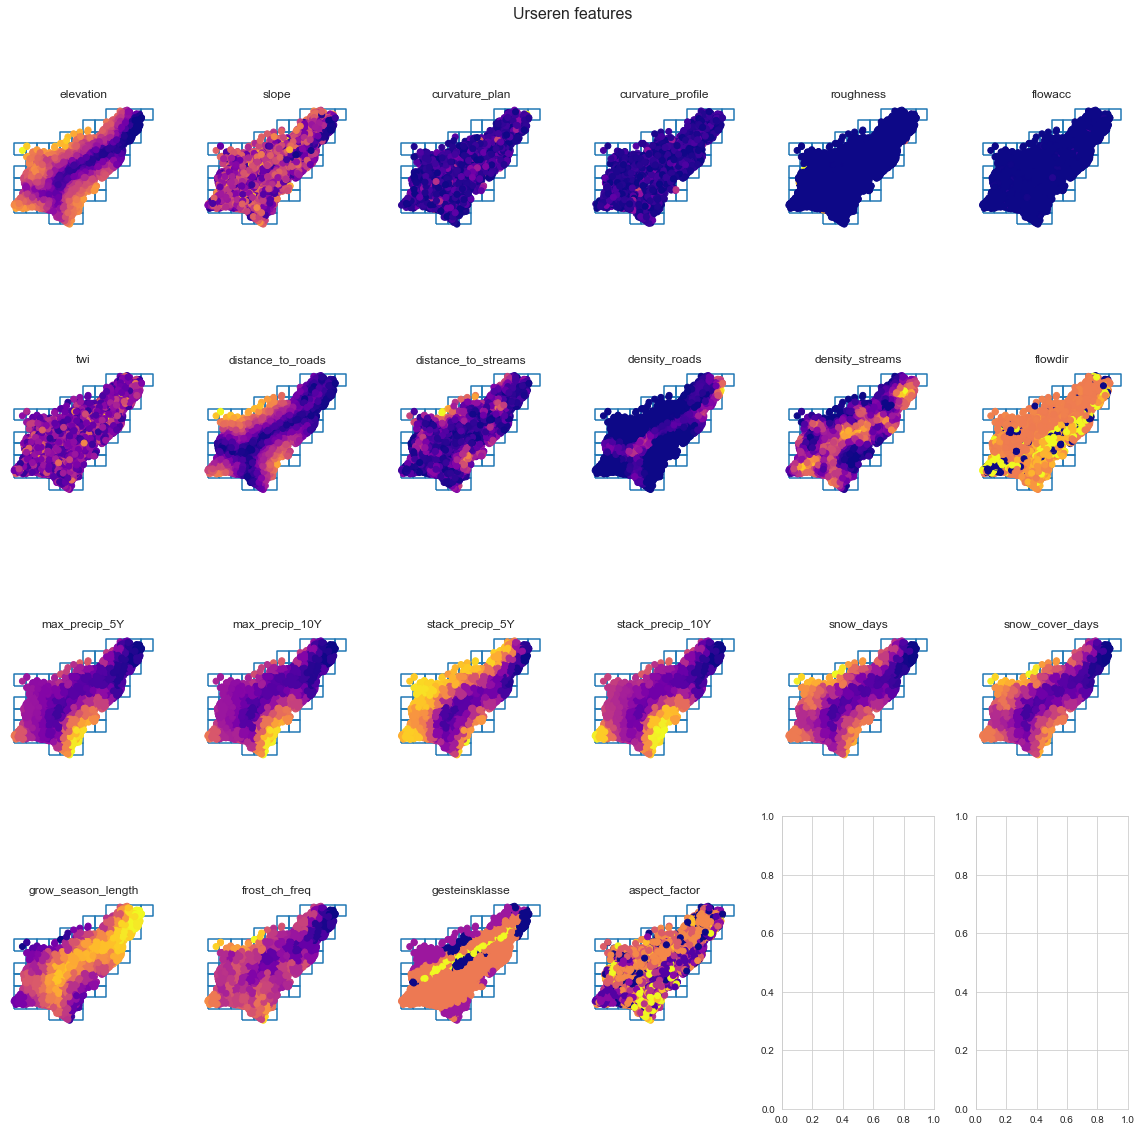

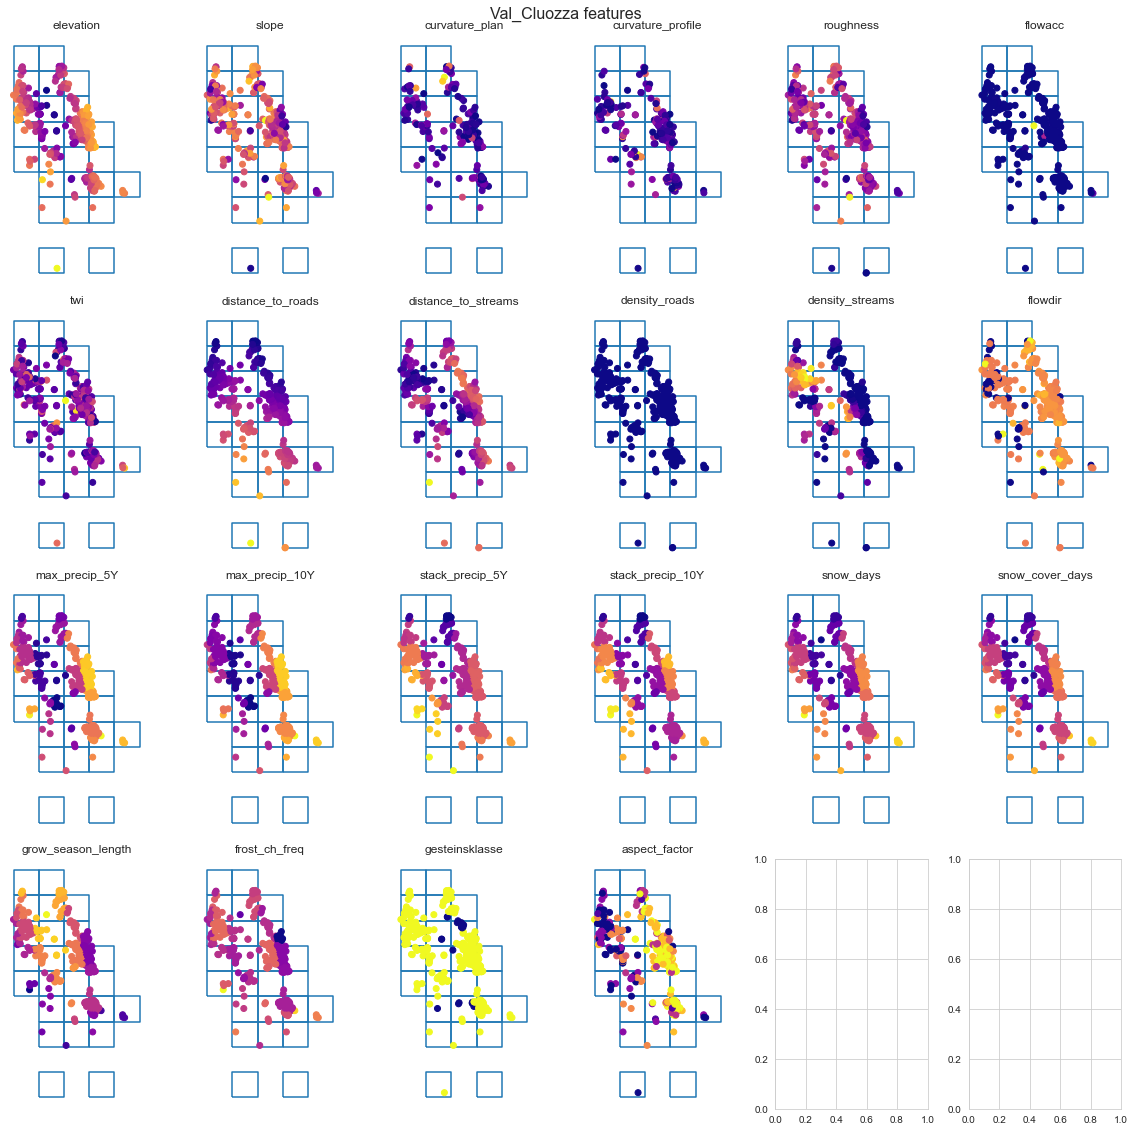

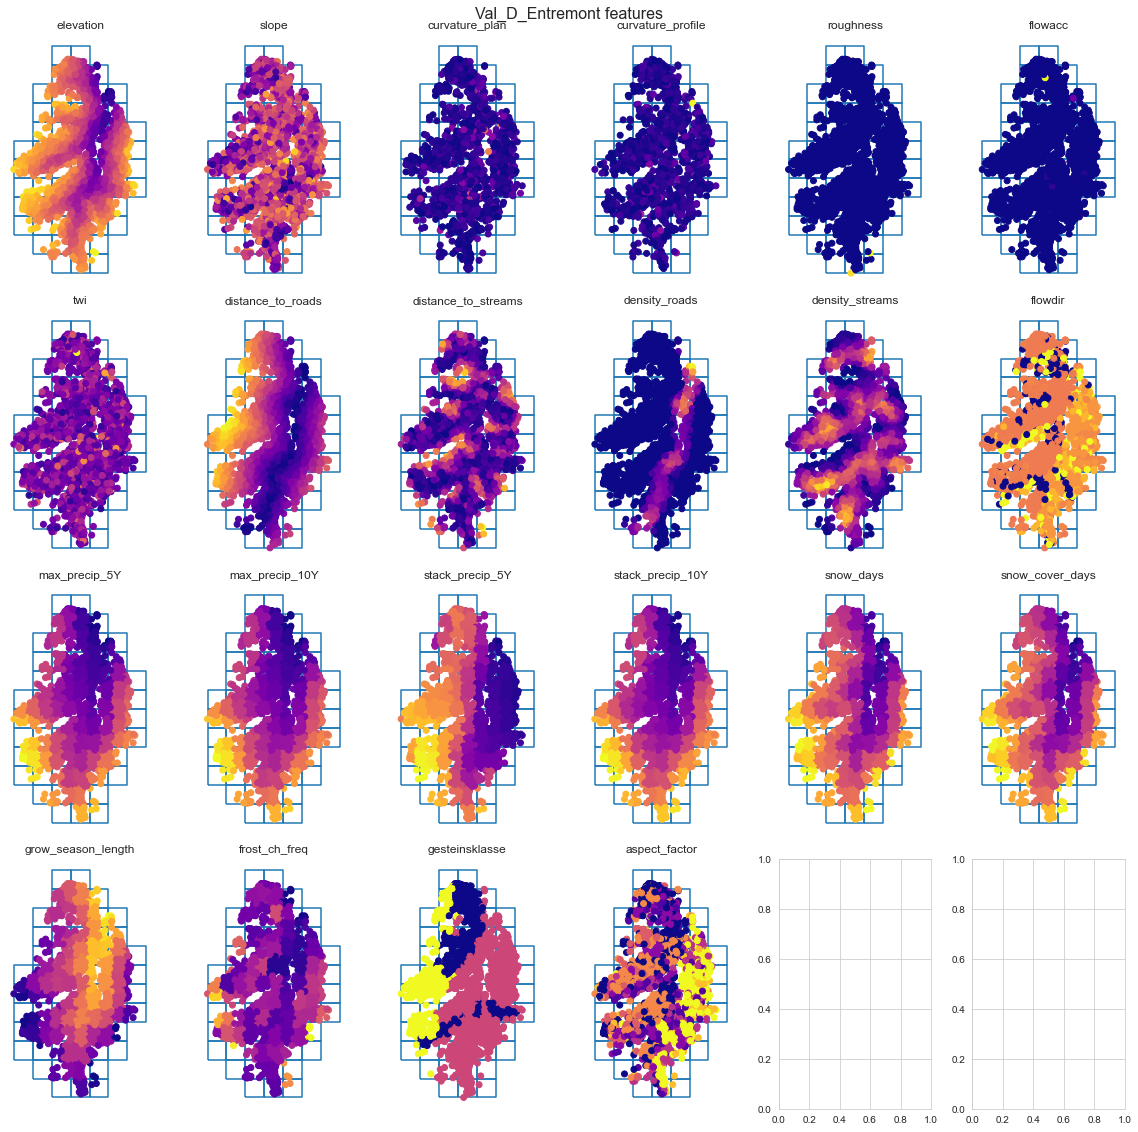

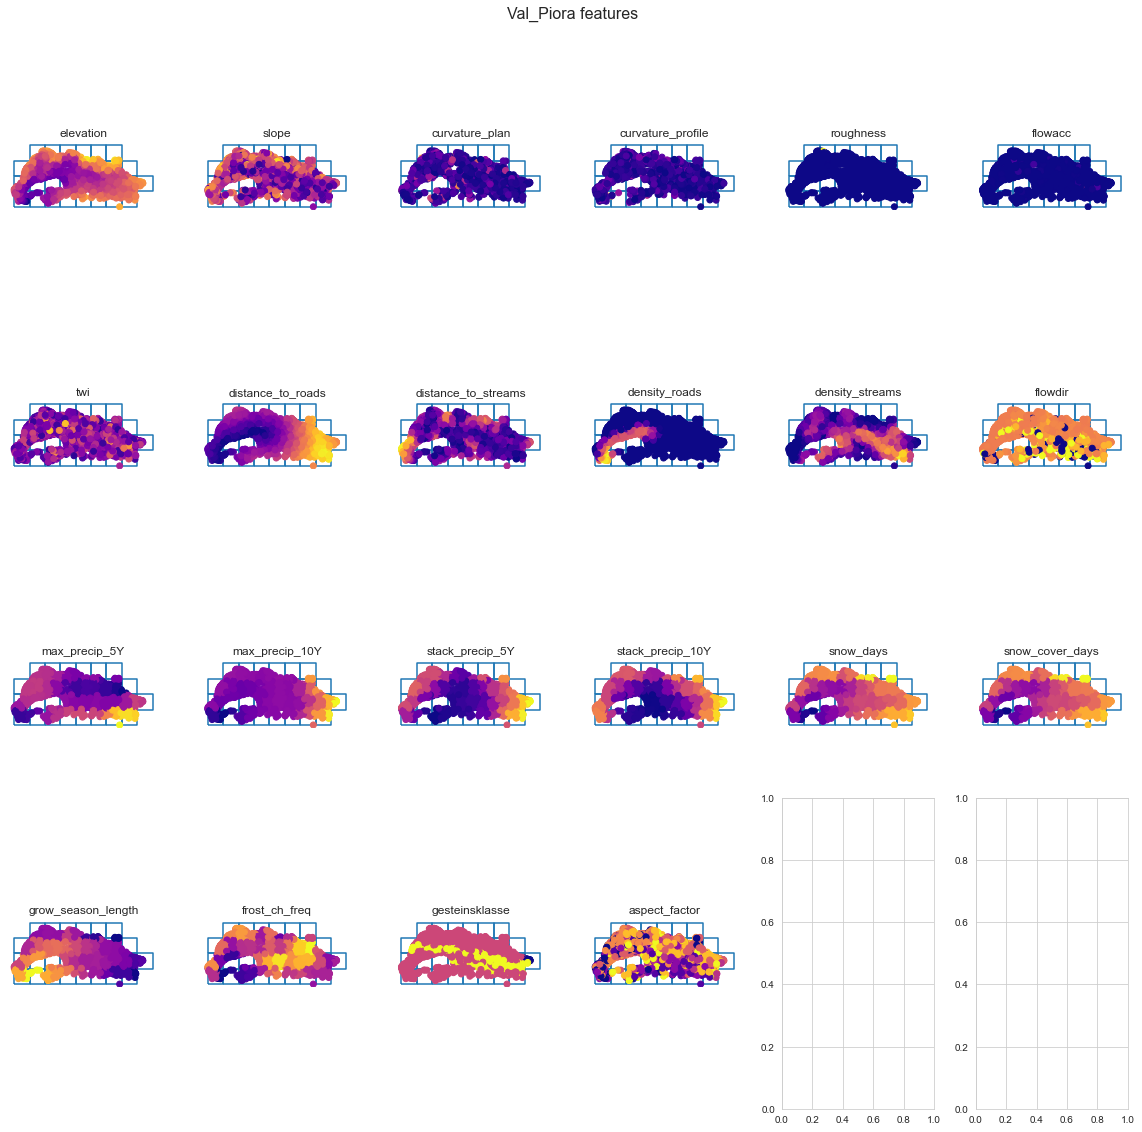

In [26]:

def plot_on_map(gdf_points, feature, ax):
    ax.axis('off')
    grid = generate_gird(1000, 1000, gdf_points.crs, *gdf_points.total_bounds)  # generate grid inside bounds
    grid = grid.loc[grid.intersects(gdf_points.unary_union)]  # filter grid cells that do not contain any point
    grid.boundary.plot(ax=ax, zorder=0)
    g = gdf_points.plot(
        feature,
        ax=ax,
        cmap='plasma',
        zorder=1
    )

plot_f(plot_on_map)

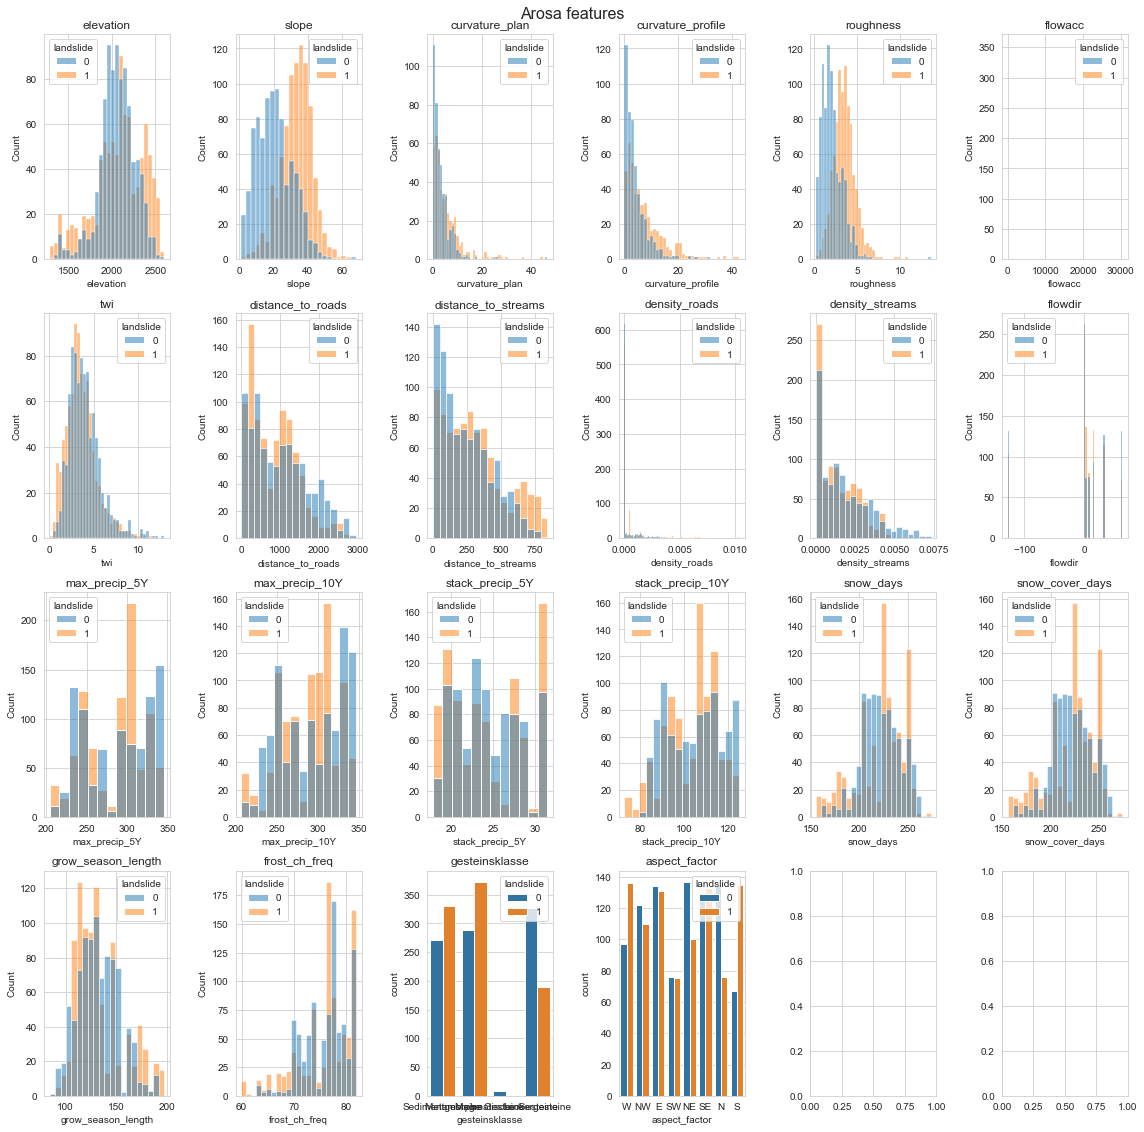

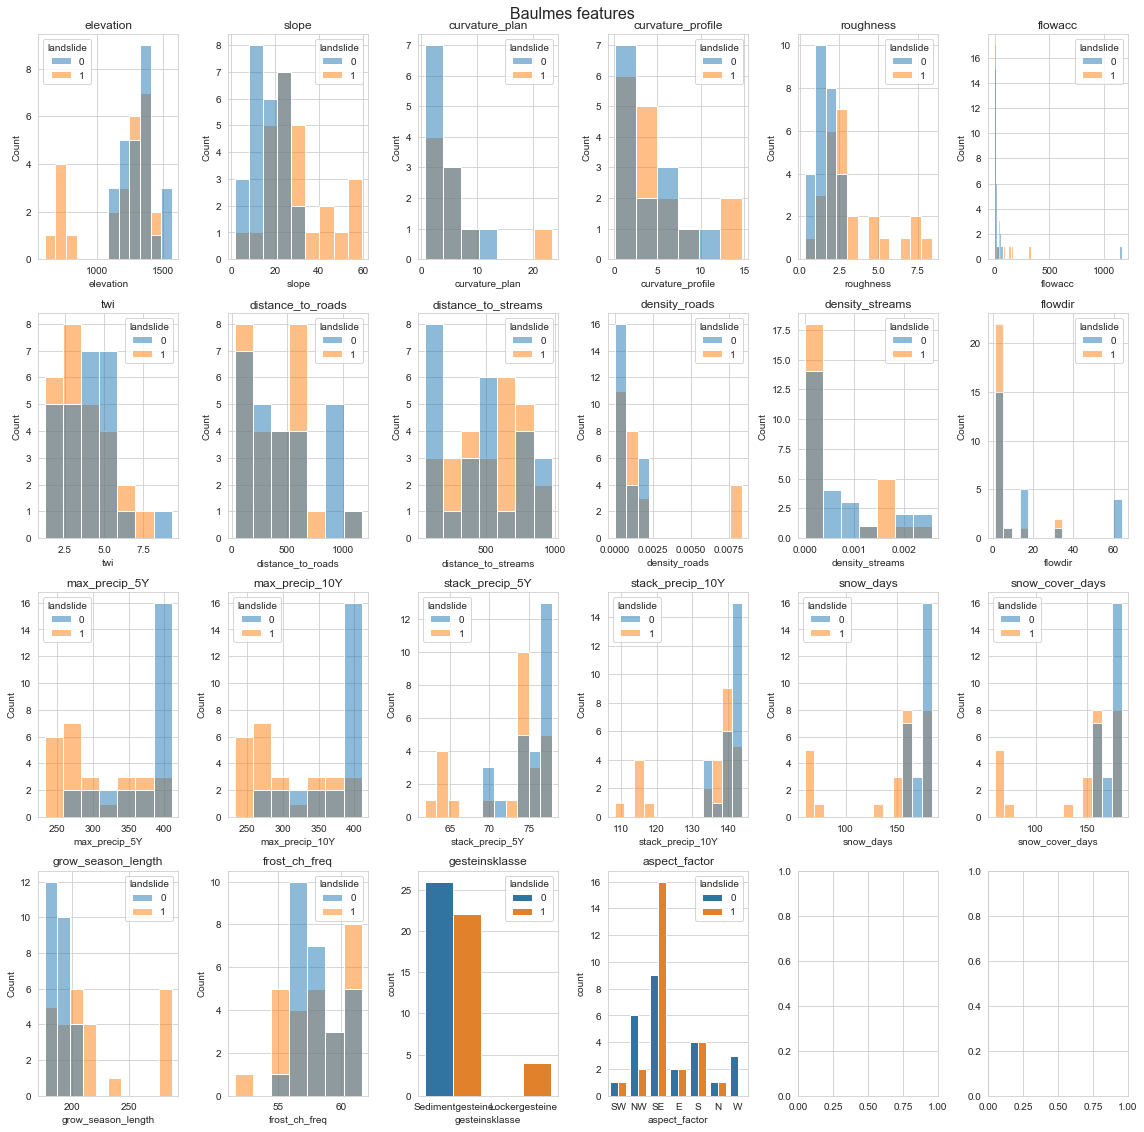

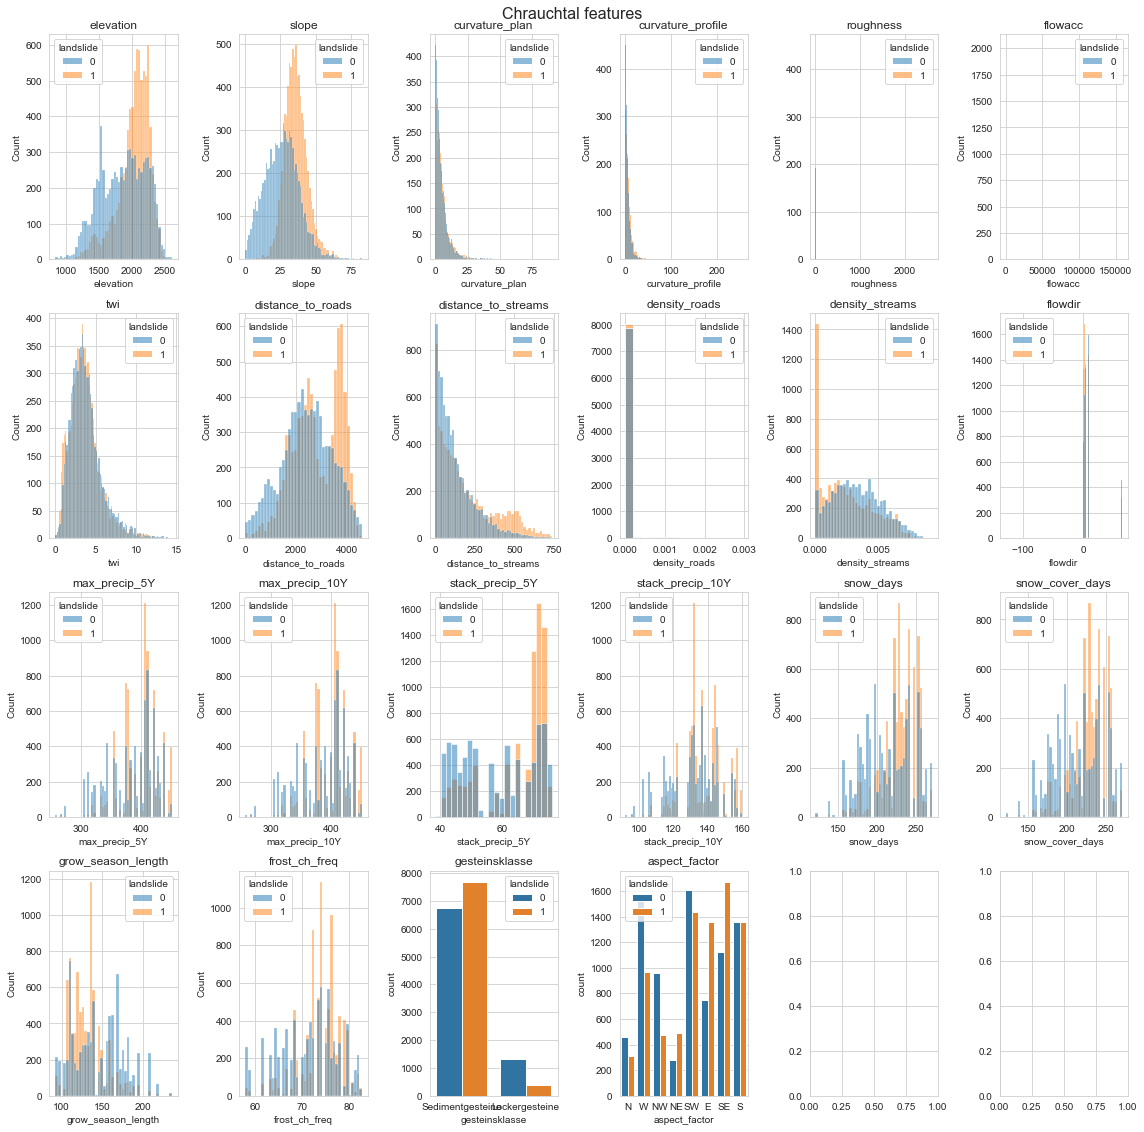

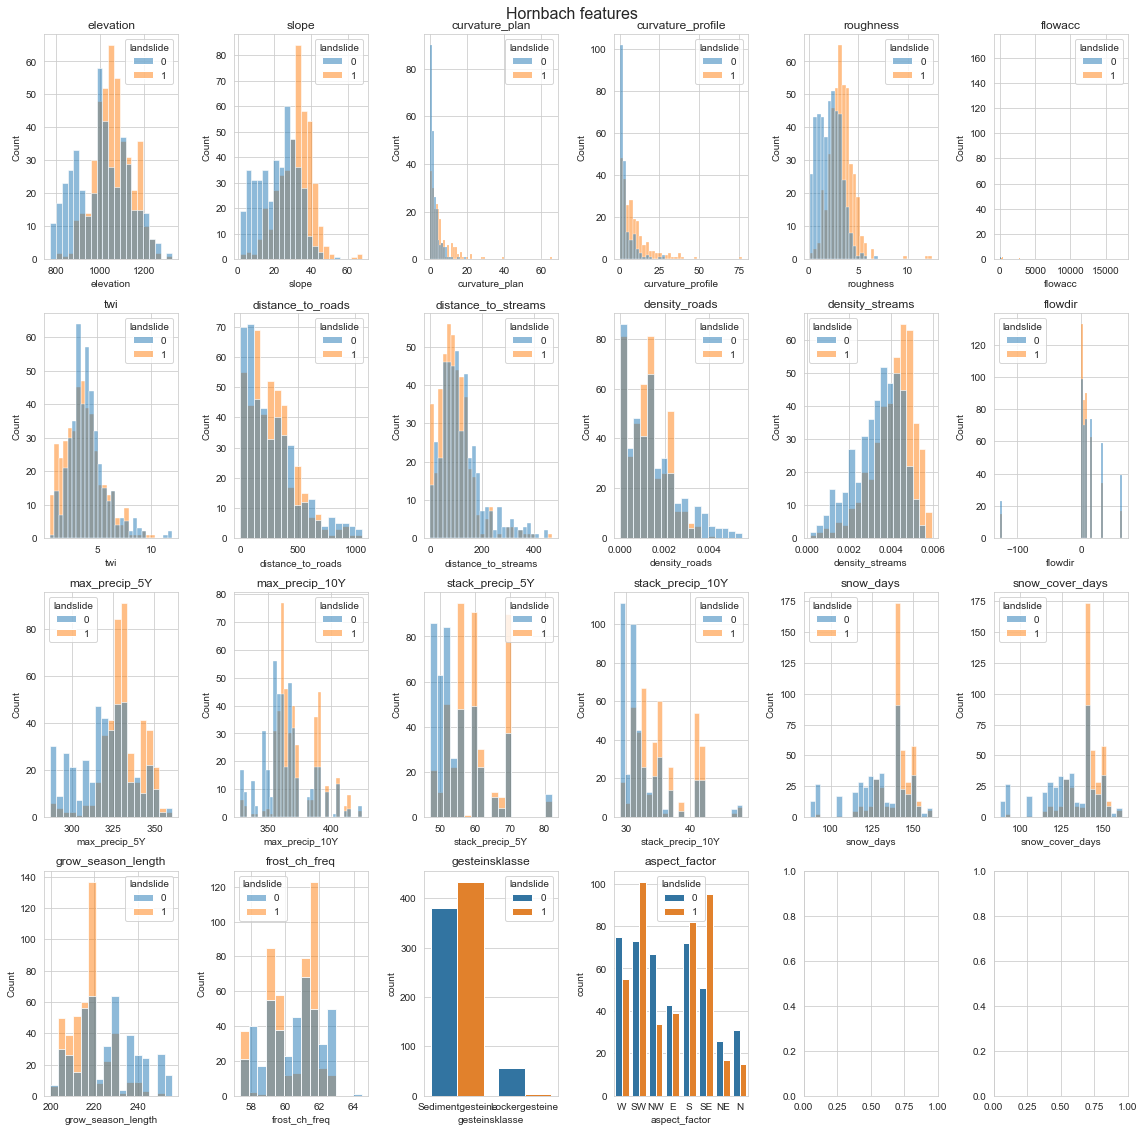

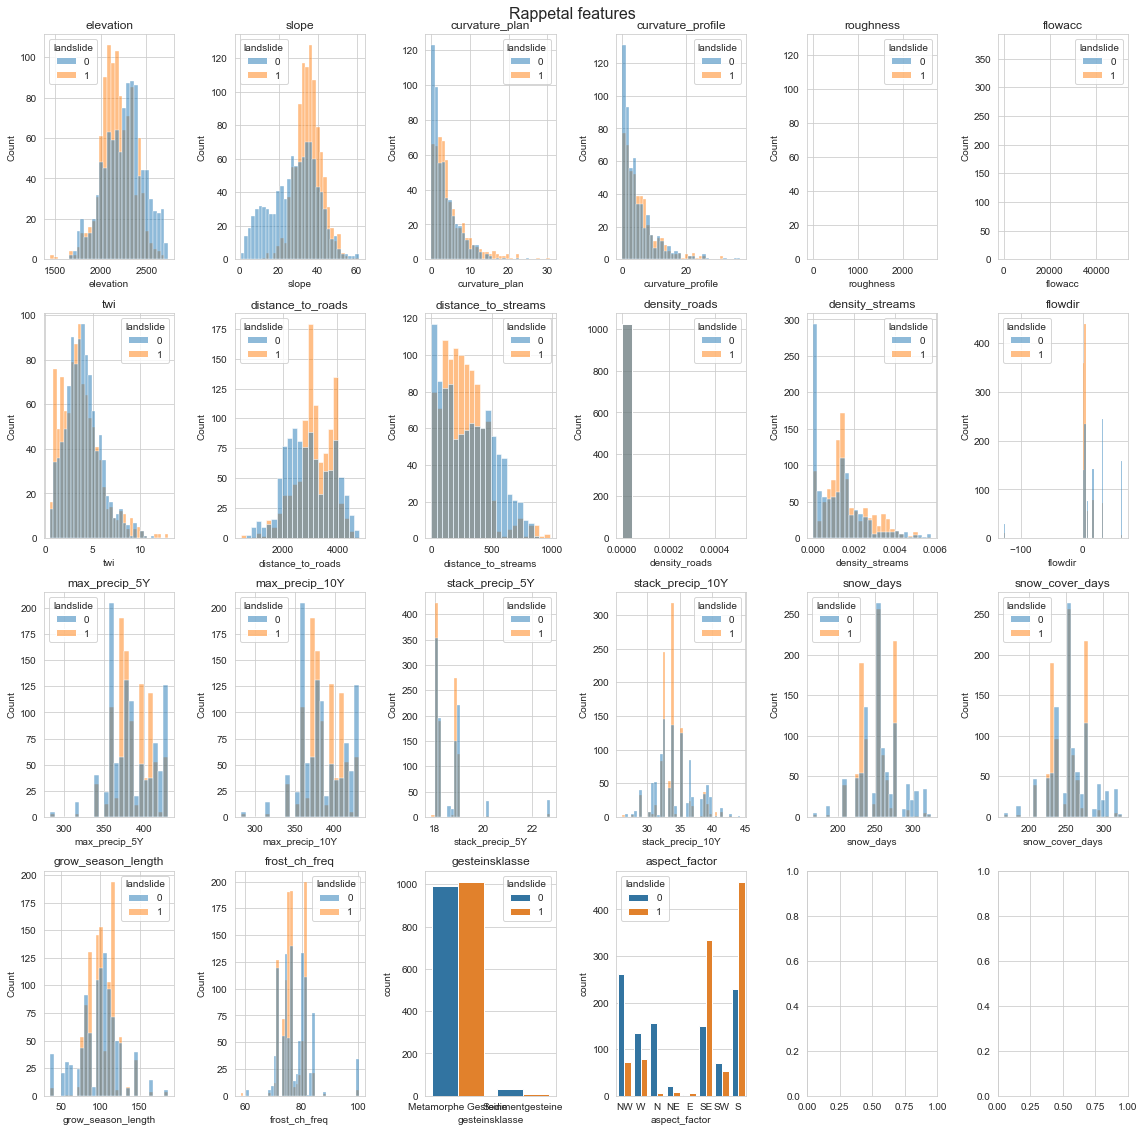

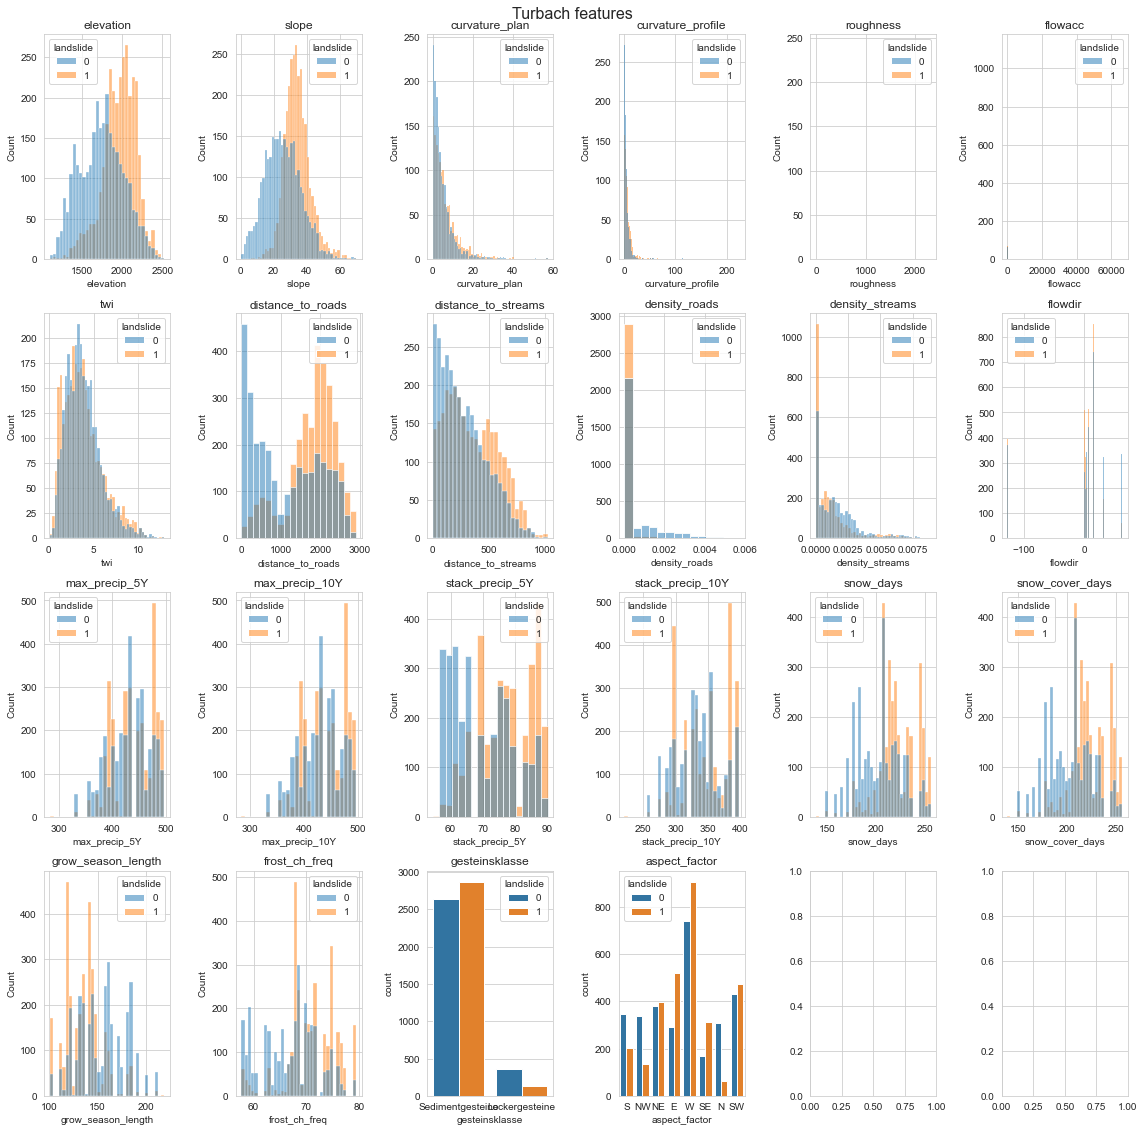

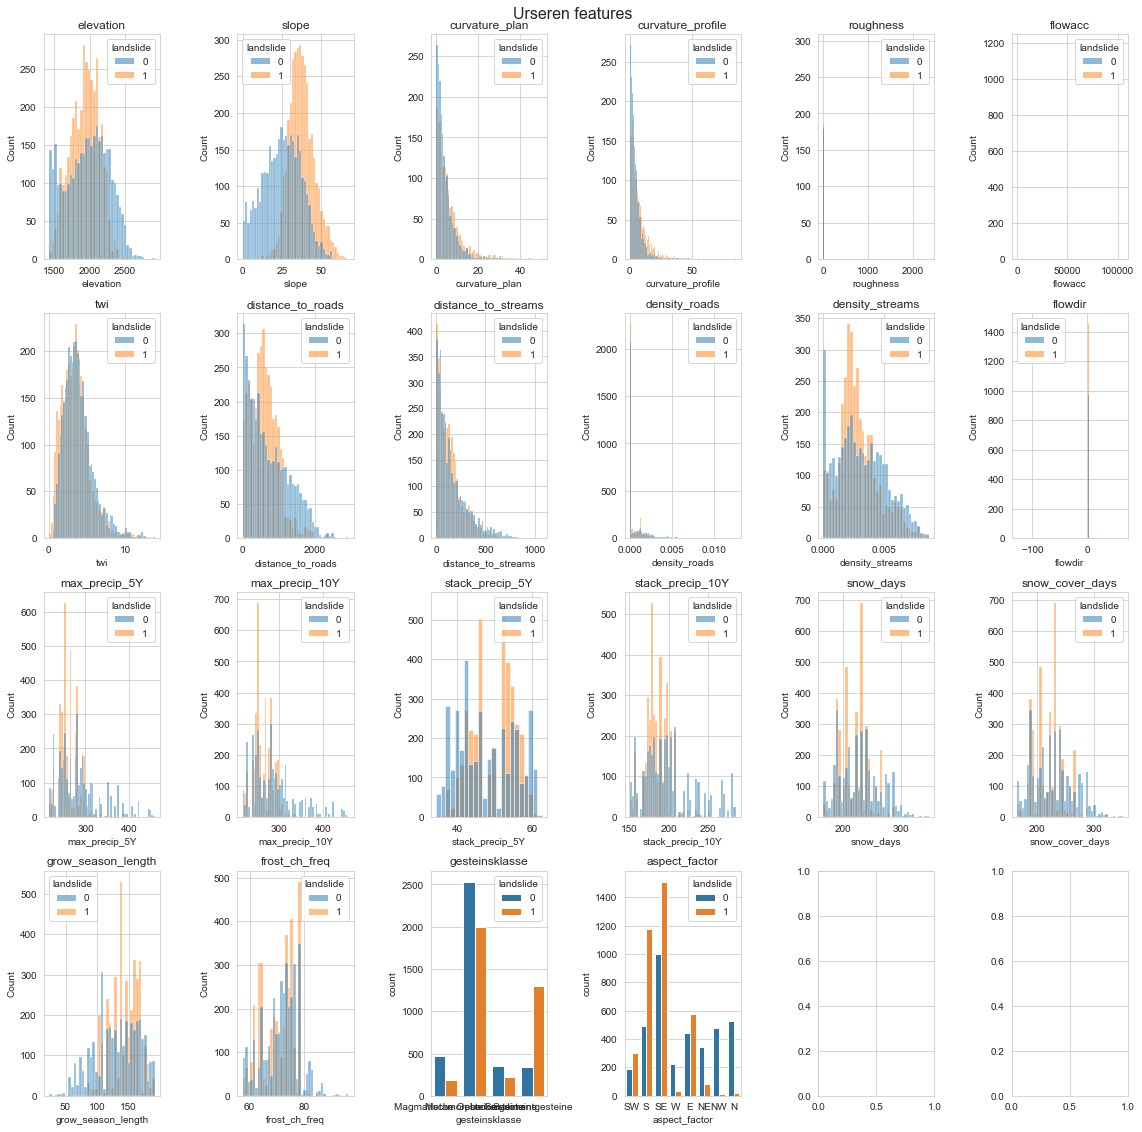

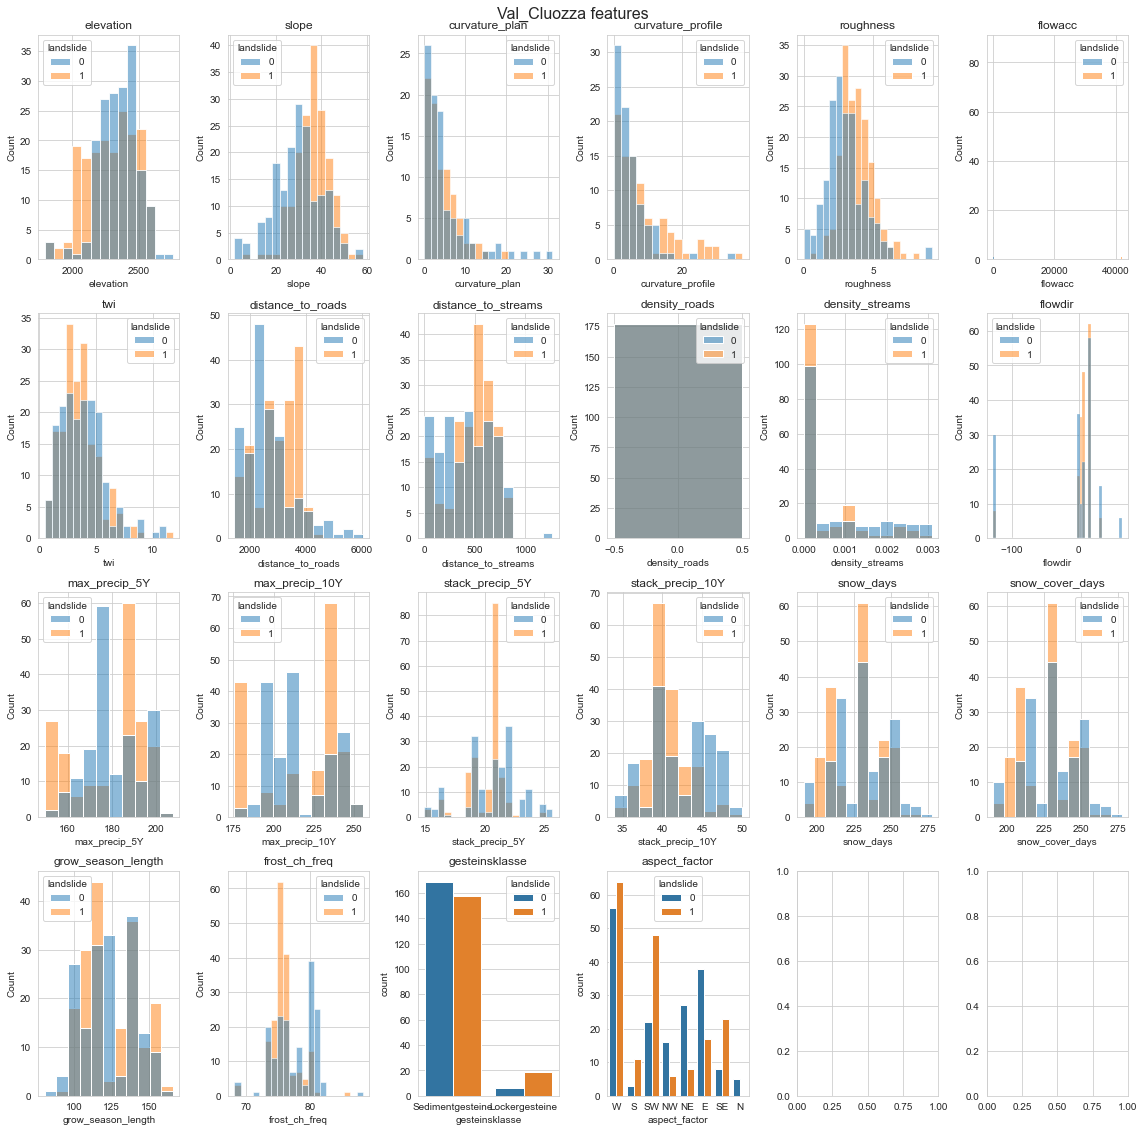

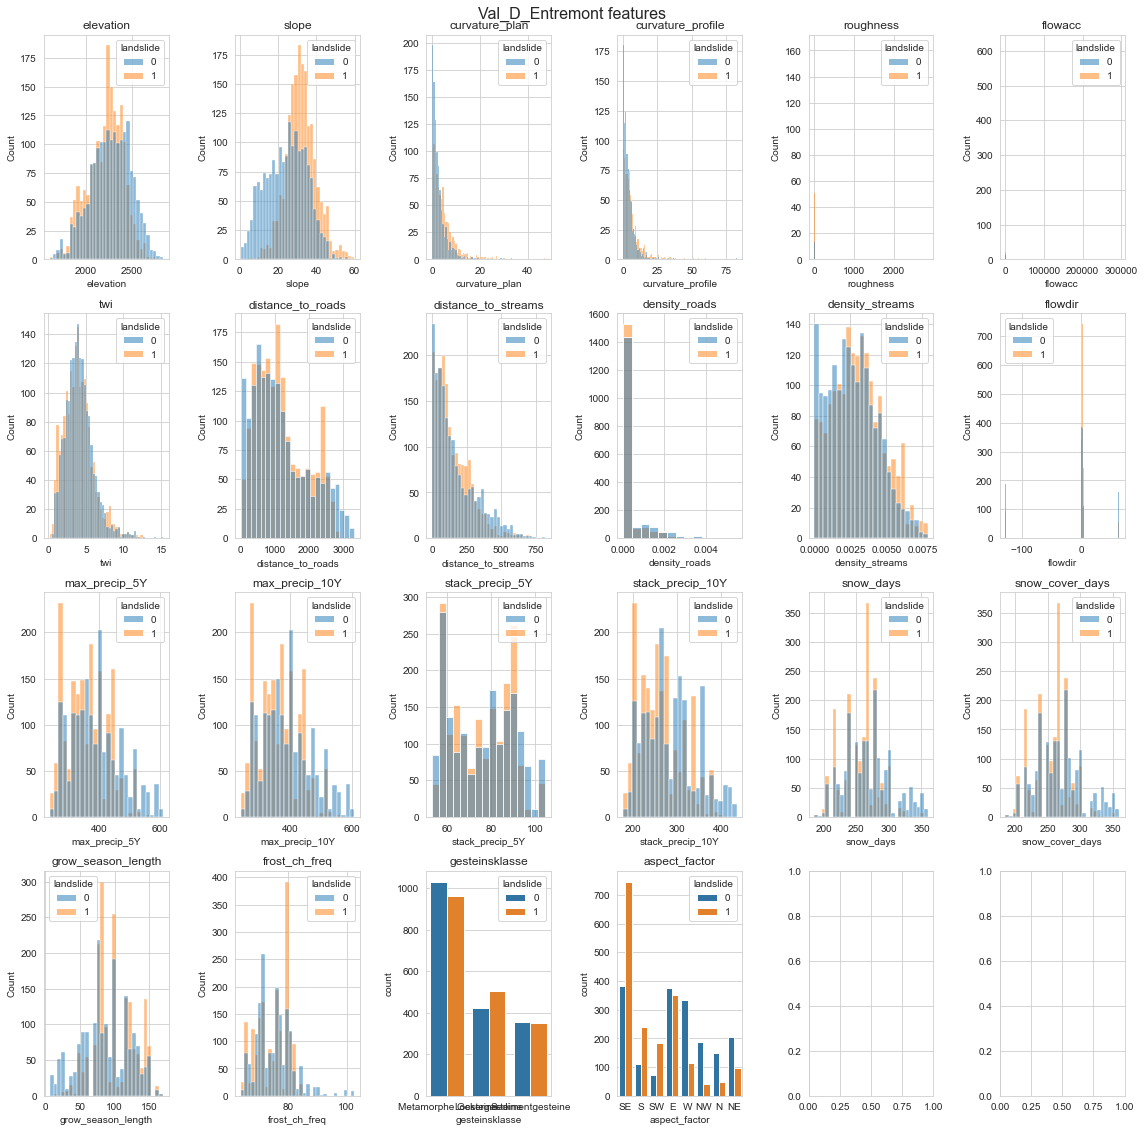

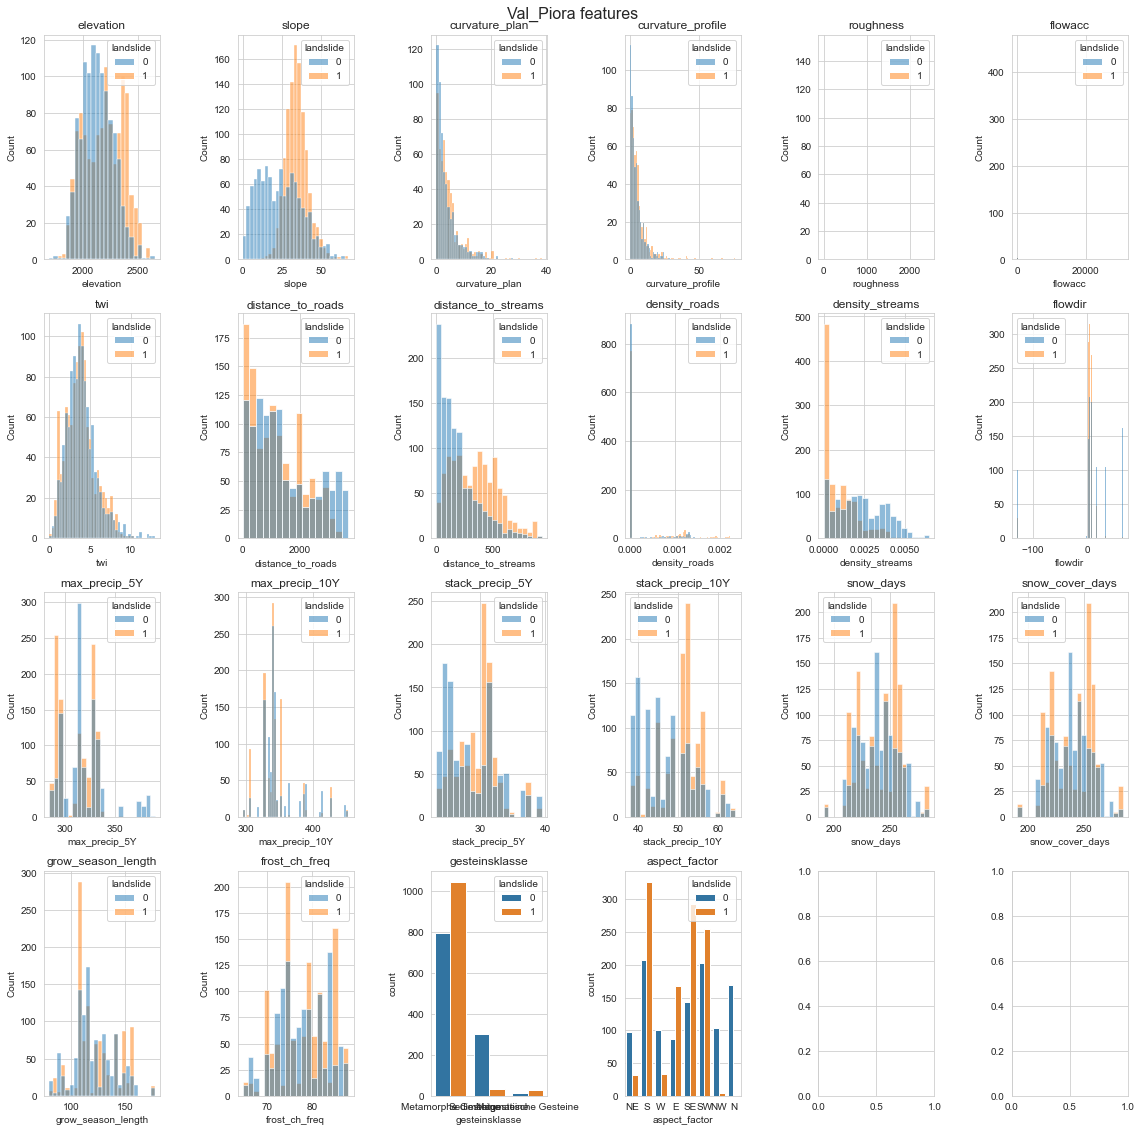

In [27]:
import numpy as np

def plot_hist(gdf, feature, ax):
    try:
        if np.issubdtype(gdf[feature].dtype, np.number):
            sns.histplot(data=gdf, x=feature, hue='landslide', ax=ax)
        else:
            sns.countplot(data=gdf, x=feature, hue='landslide', ax=ax)
    except Exception as e:
        print(f"Error in {feature}", e)
        pass

plot_f(plot_hist)